In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
import time

In [81]:
from chords.symbolic import printer_function
np_print = printer_function('np')

In [3]:
from sympy import (symbols, simplify, Matrix, Rational)
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [4]:
init_vprinting()

In [88]:
a, b, c, d, e, f = symbols('a b c d e f')

In [6]:
h = symbols('h')

In [7]:
x = symbols('x')

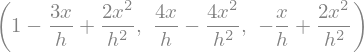

In [8]:
pol_a = 2/h**2 * x**2 - 3/h *x +1
pol_b = -4/h**2 * x**2 +4/h*x
pol_c = 2/h**2 *x**2 -1/h *x

pol_a, pol_b, pol_c

In [9]:
_a = expand((x-h)*(x-(h/2)))

In [10]:
_a.subs(x,0)

In [11]:
pol_a.subs(x,h),pol_b.subs(x,h), pol_c.subs(x,h)

In [12]:
pol_a.subs(x,h/2),pol_b.subs(x,h/2), pol_c.subs(x,h/2)

In [13]:
pol_a.subs(x,0),pol_b.subs(x,0), pol_c.subs(x,0)

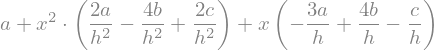

In [14]:
pol = a*pol_a + b*pol_b + c*pol_c
pol = collect(expand(pol), x)
pol

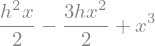

In [15]:
pol_cub_alt = expand((x-h)*(x-(h/2))*x)
pol_cub_alt

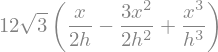

In [16]:
pol_cub = 12*sqrt(3)*expand((x/h-1)*(x/h-Rational(1/2))*x/h)
pol_cub

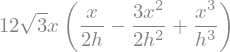

In [49]:
pol_quart = pol_cub*x
pol_quart

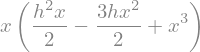

In [71]:
pol_quart_alt = pol_cub_alt*x
pol_quart_alt

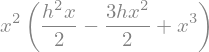

In [87]:
pol_quin_alt = pol_quart_alt*x
pol_quin_alt

In [17]:
pol_cub.subs(x,0),pol_cub.subs(x,h/2), pol_cub.subs(x,h)

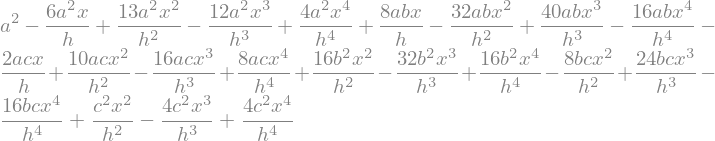

In [18]:
pol_sq = (pol**2).expand()
pol_sq

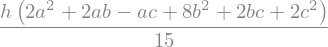

In [19]:
integ_sq = simplify(integrate(pol_sq, (x, 0, h)))
integ_sq

In [20]:
print_python(integ_sq)

h = Symbol('h')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
e = h*(2*a**2 + 2*a*b - a*c + 8*b**2 + 2*b*c + 2*c**2)/15


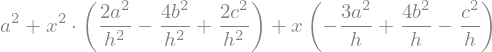

In [21]:
pol_hs = a**2*pol_a + b**2*pol_b + c**2*pol_c
pol_hs = collect(expand(pol_hs), x)
pol_hs

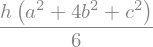

In [22]:
integ_hs = simplify(integrate(pol_hs, (x, 0, h)))
integ_hs

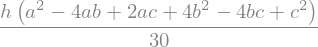

In [23]:
simplify(integ_hs-integ_sq)

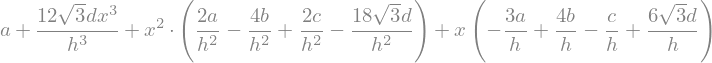

In [24]:
pol_gran = pol + d* pol_cub
pol_gran = collect(expand(pol_gran), x)
pol_gran

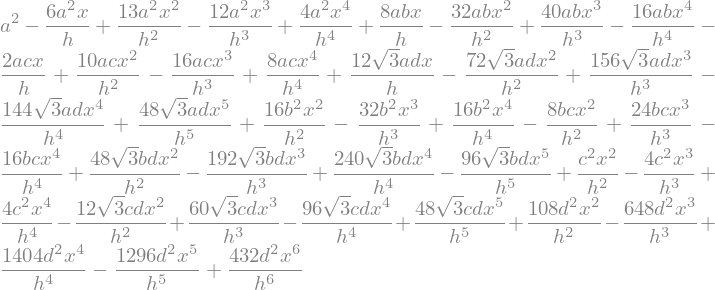

In [25]:
pol_gran_sq = (pol_gran**2).expand()
pol_gran_sq

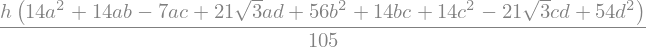

In [26]:
integ_gran_sq = simplify(integrate(pol_gran_sq, (x, 0, h)))
integ_gran_sq

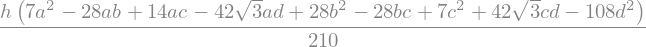

In [27]:
res = simplify(integ_hs-integ_gran_sq)
res

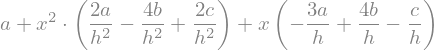

In [28]:
pol

In [29]:
pol_d = pol.diff(x)

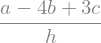

In [30]:
pol_d.subs(x, h).simplify()

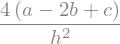

In [31]:
pol_d.diff(x).simplify()

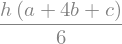

In [32]:
pol.integrate((x, 0, h)).simplify()

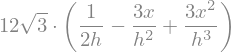

In [33]:
pol_cub.diff(x)

In [34]:
pol_cub_max, pol_cub_min = solve(pol_cub.diff(x), x)

In [35]:
max_cub = pol_cub.subs(x, pol_cub_max).simplify()
max_cub

In [36]:
sqrt(3)/36

In [37]:
pol_a_num = lambdify([x,h], pol_a)
pol_b_num = lambdify([x,h], pol_b)
pol_c_num = lambdify([x,h], pol_c)
pol_cub_num = lambdify([x,h], pol_cub)
pol_cub_alt_num = lambdify([x,h], pol_cub_alt)

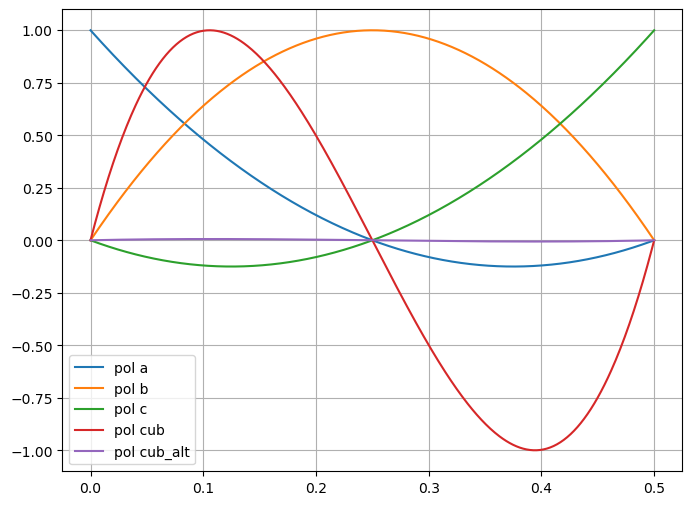

In [38]:
plt.figure(figsize=[8,6])

h_num = 0.5

x_arr = np.linspace(0, h_num, 500)
pol_a_arr = pol_a_num(x_arr, h_num)
pol_b_arr = pol_b_num(x_arr, h_num)
pol_c_arr = pol_c_num(x_arr, h_num)
pol_cub_arr = pol_cub_num(x_arr, h_num)
pol_cub_alt_arr = pol_cub_alt_num(x_arr, h_num)

plt.plot(x_arr, pol_a_arr, label = 'pol a')
plt.plot(x_arr, pol_b_arr, label = 'pol b')
plt.plot(x_arr, pol_c_arr, label = 'pol c')
plt.plot(x_arr, pol_cub_arr, label = 'pol cub')
plt.plot(x_arr, pol_cub_alt_arr, label = 'pol cub_alt')


plt.grid()
plt.legend()

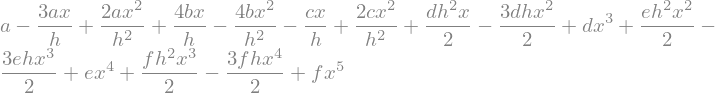

In [89]:
pol_5 = pol + d * pol_cub_alt + e * pol_quart_alt + f *pol_quin_alt
pol_5 = pol_5.expand()
pol_5

In [113]:
pol_5.subs(x, 0), pol_5.subs(x, h/2), pol_5.subs(x, h)

In [90]:
pol_5_d = pol_5.diff(x).expand()
pol_5_dd = pol_5.diff(x,2).expand()
pol_5_ddd = pol_5.diff(x,3).expand()

In [91]:
pol_5_ddd

In [93]:
x0 = symbols('x_0')
x0

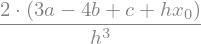

In [94]:
sol_5d = solve(pol_5_d.subs(x, 0)-x0, d)
sol_5d[0]

In [95]:
np_print(sol_5d[0])

'2*(3*a - 4*b + c + h*x_0)/h**3'

In [116]:
simplify(pol_5_d.subs(x, 0).subs(d, sol_5d[0]))

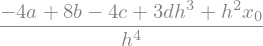

In [96]:
sol_5dd = solve(pol_5_dd.subs(x, 0)-x0, e)
sol_5dd[0]

In [97]:
np_print(sol_5dd[0])

'(-4*a + 8*b - 4*c + 3*d*h**3 + h**2*x_0)/h**4'

In [117]:
simplify(pol_5_dd.subs(x, 0).subs(e, sol_5dd[0]))

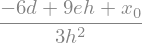

In [98]:
sol_5ddd = solve(pol_5_ddd.subs(x, 0)-x0, f)
sol_5ddd[0]

In [99]:
np_print(sol_5ddd[0])

'(1/3)*(-6*d + 9*e*h + x_0)/h**2'

In [118]:
simplify(pol_5_ddd.subs(x, 0).subs(f, sol_5ddd[0]))

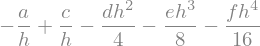

In [119]:
pol_5_d.subs(x, h/2)

In [120]:
np_print(pol_5_d.subs(x, h/2))

'-a/h + c/h - 1/4*d*h**2 - 1/8*e*h**3 - 1/16*f*h**4'

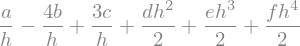

In [121]:
pol_5_d.subs(x, h)

In [122]:
np_print(pol_5_d.subs(x, h))

'a/h - 4*b/h + 3*c/h + (1/2)*d*h**2 + (1/2)*e*h**3 + (1/2)*f*h**4'

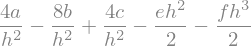

In [101]:
pol_5_dd.subs(x, h/2)

In [104]:
np_print(pol_5_dd.subs(x, h/2))

'4*a/h**2 - 8*b/h**2 + 4*c/h**2 - 1/2*e*h**2 - 1/2*f*h**3'

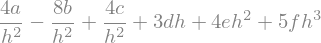

In [102]:
pol_5_dd.subs(x, h)

In [103]:
np_print(pol_5_dd.subs(x, h))

'4*a/h**2 - 8*b/h**2 + 4*c/h**2 + 3*d*h + 4*e*h**2 + 5*f*h**3'

In [107]:
pol_5_ddd.subs(x, h/2)

In [111]:
np_print(pol_5_ddd.subs(x, h/2))

'6*d + 3*e*h'

In [109]:
pol_5_ddd.subs(x, h)

In [110]:
np_print(pol_5_ddd.subs(x, h))

'6*d + 15*e*h + 27*f*h**2'

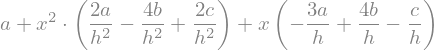

In [39]:
pol

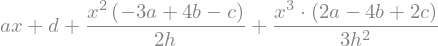

In [40]:
u_cub = integrate(pol, x) +d
u_cub

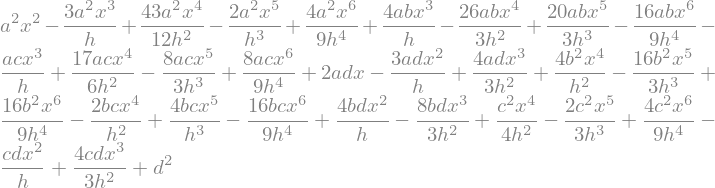

In [41]:
u_cub_sq = expand(u_cub**2)
u_cub_sq

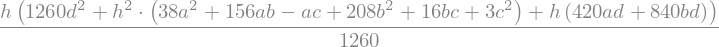

In [42]:
res_int = simplify(integrate(u_cub_sq, (x, 0, h))).factor(h)
res_int

In [43]:
print_python(res_int)

h = Symbol('h')
d = Symbol('d')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
e = h*(1260*d**2 + h**2*(38*a**2 + 156*a*b - a*c + 208*b**2 + 16*b*c + 3*c**2) + h*(420*a*d + 840*b*d))/1260


In [44]:
from matplotlib import colormaps

In [45]:
cc = colormaps['cubehelix'](np.linspace(1, 0, 4))

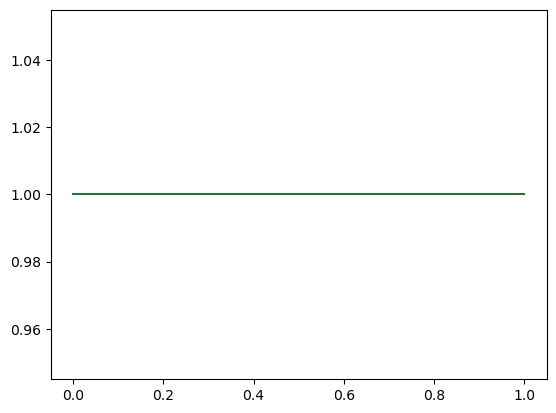

In [46]:
plt.plot([0,1],[1,1], c=cc[2])

In [3]:
from chords.pseudospectral import LGR, CG, CGL, CGR, v_coef, v_coef_coll
from chords.util import get_weights

In [4]:
N = 200
np.max(np.abs(np.array(CGL(N)) + np.array(CGL(N)[::-1])))

4.440892098500626e-16

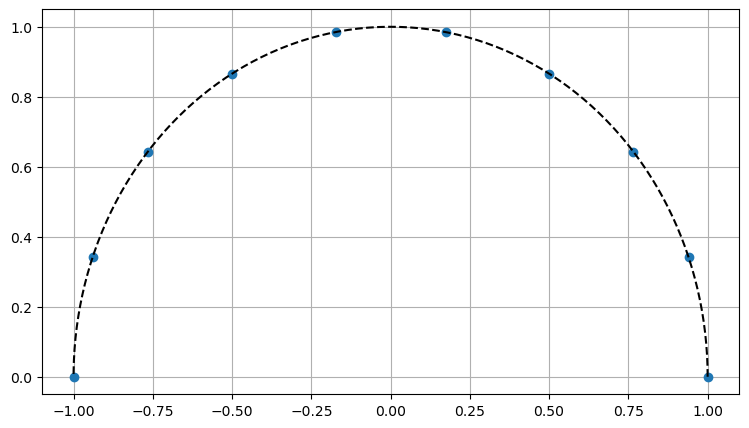

In [5]:
N = 10
t = np.array(CGL(N))
y = get_weights(N, 'CG')
y_b = np.sqrt(1-t**2)

_th = np.linspace(0, np.pi, 200)
_t = np.cos(_th)
_y = np.sin(_th)#*2/np.sum(y_b)

plt.figure(figsize=[9,5])
plt.xlim((-1.1,1.1))
#plt.ylim((-0.1,1.1))
plt.plot(t, y_b, 'o')
plt.plot(_t, _y, 'k--')
plt.grid()


In [6]:
y_b * 2 / np.sum(y_b) - y

array([-0.04293912, -0.02526016,  0.00636414,  0.02452807,  0.03730707,
        0.03730707,  0.02452807,  0.00636414, -0.02526016, -0.04293912])

In [7]:
np.sum(y_b)

5.67128181961771

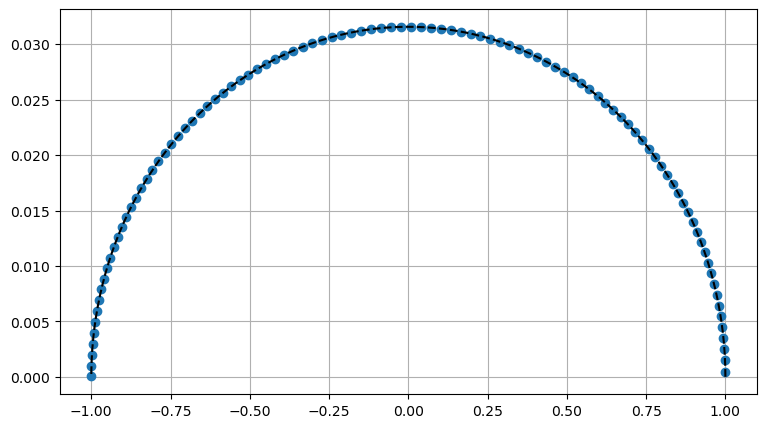

In [8]:
N = 100
t = np.array(CGR(N))
y = get_weights(N, 'CGR')
y_b = np.sqrt(1-t**2)

_th = np.linspace(0, np.pi, 200)
_t = np.cos(_th)
_y = np.sin(_th)*2/np.sum(y_b)

plt.figure(figsize=[9,5])
plt.xlim((-1.1,1.1))
#plt.ylim((-0.1,1.1))
plt.plot(t, y, 'o')
plt.plot(_t, _y, 'k--')
plt.grid()


In [9]:
y_b * 2 / np.sum(y_b) - y

array([-1.01517689e-04,  2.46265634e-05, -9.23728527e-06,  5.14765479e-06,
       -3.32564052e-06,  2.68589901e-06, -1.99632170e-06,  1.97948941e-06,
       -1.48587154e-06,  1.70581438e-06, -1.22722741e-06,  1.58722918e-06,
       -1.07137140e-06,  1.53744184e-06, -9.65852420e-07,  1.52267984e-06,
       -8.88517930e-07,  1.52752570e-06, -8.28780956e-07,  1.54411506e-06,
       -7.81121077e-07,  1.56808488e-06, -7.42477246e-07,  1.59685143e-06,
       -7.11081536e-07,  1.62880516e-06, -6.85891280e-07,  1.66290492e-06,
       -6.66293226e-07,  1.69846085e-06, -6.51940787e-07,  1.73501248e-06,
       -6.42660539e-07,  1.77225775e-06, -6.38396728e-07,  1.81001072e-06,
       -6.39177668e-07,  1.84817602e-06, -6.45095365e-07,  1.88673375e-06,
       -6.56293532e-07,  1.92573116e-06, -6.72961258e-07,  1.96527896e-06,
       -6.95330784e-07,  2.00555118e-06, -7.23678544e-07,  2.04678808e-06,
       -7.58329107e-07,  2.08930165e-06, -7.99661968e-07,  2.13348413e-06,
       -8.48121467e-07,  

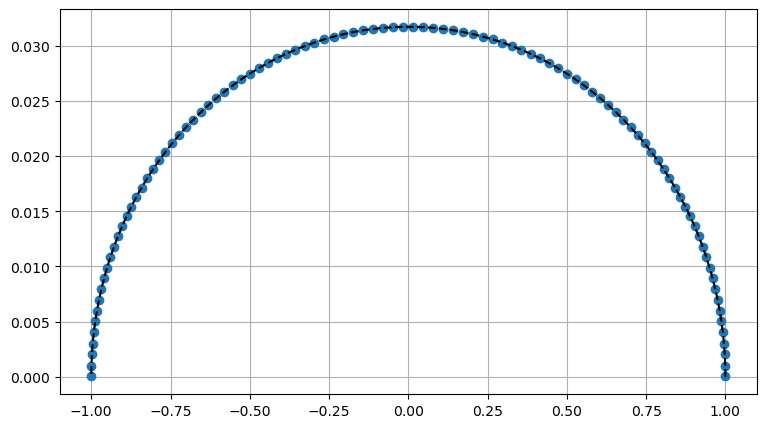

In [10]:
N = 100
t = np.array(CGL(N))
y = get_weights(N, 'CGL')
y_b = np.sqrt(1-t**2)

_th = np.linspace(0, np.pi, 200)
_t = np.cos(_th)
_y = np.sin(_th)*2/np.sum(y_b)

plt.figure(figsize=[9,5])
plt.xlim((-1.1,1.1))
#plt.ylim((-0.1,1.1))
plt.plot(t, y, 'o')
plt.plot(_t, _y, 'k--')
plt.grid()


In [11]:
y_b * 2 / np.sum(y_b) - y

array([-1.02030405e-04,  2.39087515e-05, -8.17253012e-06,  4.35844311e-06,
       -2.07285188e-06,  1.99581359e-06, -6.01882711e-07,  1.40397208e-06,
        4.14564901e-08,  1.24639092e-06,  4.29489468e-07,  1.24209427e-06,
        7.12275249e-07,  1.30340044e-06,  9.42344273e-07,  1.39568397e-06,
        1.14164026e-06,  1.50286671e-06,  1.32044529e-06,  1.61650783e-06,
        1.48394708e-06,  1.73171208e-06,  1.63487510e-06,  1.84539136e-06,
        1.77468122e-06,  1.95545206e-06,  1.90411598e-06,  2.06038575e-06,
        2.02353022e-06,  2.15904987e-06,  2.13304239e-06,  2.25054451e-06,
        2.23263615e-06,  2.33414007e-06,  2.32221974e-06,  2.40923339e-06,
        2.40166362e-06,  2.47532034e-06,  2.47082507e-06,  2.53197822e-06,
        2.52956492e-06,  2.57885413e-06,  2.57775915e-06,  2.61565711e-06,
        2.61530726e-06,  2.64215264e-06,  2.64213839e-06,  2.65815856e-06,
        2.65821607e-06,  2.66354189e-06,  2.66354189e-06,  2.65821607e-06,
        2.65815856e-06,  

In [12]:
def cheb_first(n):
    tau = np.arange(n+1)
    return np.cos((2*tau+1)*np.pi/(2*n+2))

def w_cheb_first(n):
    
    tau = np.arange(n+1)
    return (-1)**tau * np.sin((2*tau+1)*np.pi/(2*n+2))

In [13]:
from chords.pseudospectral import coll_points, _v_sum
def v_coef_coll(N, i, scheme, precission=16, order=2):
    """
    Generates the coefficient V for barycentric coordinates for
    Polynomials constructed over collocation points.

    Parameters
    ----------
    N : int
        Number of node points
    i : int
        index of current point
    scheme : str
        Scheme name. Supported values are:
            'LG'
            'LG_inv'
            'LGR'
            'LGR_inv'
            'LGL'
            'LGLm'
            'LG2'
            'D2'
            'JG'
            'CG'
            'CG_inv'
            'CGR'
            'CGR_inv'
            'CGL'
    precission: int, default 20
        number of decimal places of precission

    Returns
    -------
    v_i : float
        coefficient V.

    """
    taus = coll_points(N, scheme, precission, order)
    taus = list(2*np.array(taus, dtype = "float64"))
    return N*_v_sum(taus, i)

In [14]:
cheb_first(4)

array([ 9.51056516e-01,  5.87785252e-01,  6.12323400e-17, -5.87785252e-01,
       -9.51056516e-01])

In [15]:
np.array(CG(5))

array([-9.51056516e-01, -5.87785252e-01,  6.12323400e-17,  5.87785252e-01,
        9.51056516e-01])

In [16]:
v_coef_coll(5, 4, 'CG')

0.3090169943749477

In [17]:
def v_coef_array(N, scheme):
    v_arr = [v_coef_coll(N, ii, scheme) for ii in range(N)]
    return np.array(v_arr)

In [19]:
n = 10
w_cheb_first(n-1)

array([ 0.15643447, -0.4539905 ,  0.70710678, -0.89100652,  0.98768834,
       -0.98768834,  0.89100652, -0.70710678,  0.4539905 , -0.15643447])

In [20]:
v_coef_array(n, 'CG')

array([-0.15643447,  0.4539905 , -0.70710678,  0.89100652, -0.98768834,
        0.98768834, -0.89100652,  0.70710678, -0.4539905 ,  0.15643447])

In [21]:
n = 78
w_cheb_first(n-1) / v_coef_array(n, 'CG')

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [75]:
v_coef_n_arr = np.array([v_coef_coll(ii, ii//2, 'CGL') for ii in range(1,50)])

/Users/smorenom/Documents/Python/Repo Github/chords/chords/pseudospectral.py:148: RuntimeWarning: invalid value encountered in true_divide
  theta = pi * (arange(0, N, dtype="float64")) / (N - 1)


In [76]:
v_coef_n_arr

array([ 1.        ,  0.5       , -0.75      , -0.66666667,  0.625     ,
        0.6       , -0.58333333, -0.57142857,  0.5625    ,  0.55555556,
       -0.55      , -0.54545455,  0.54166667,  0.53846154, -0.53571429,
       -0.53333333,  0.53125   ,  0.52941176, -0.52777778, -0.52631579,
        0.525     ,  0.52380952, -0.52272727, -0.52173913,  0.52083333,
        0.52      , -0.51923077, -0.51851852,  0.51785714,  0.51724138,
       -0.51666667, -0.51612903,  0.515625  ,  0.51515152, -0.51470588,
       -0.51428571,  0.51388889,  0.51351351, -0.51315789, -0.51282051,
        0.5125    ,  0.51219512, -0.51190476, -0.51162791,  0.51136364,
        0.51111111, -0.51086957, -0.5106383 ,  0.51041667])

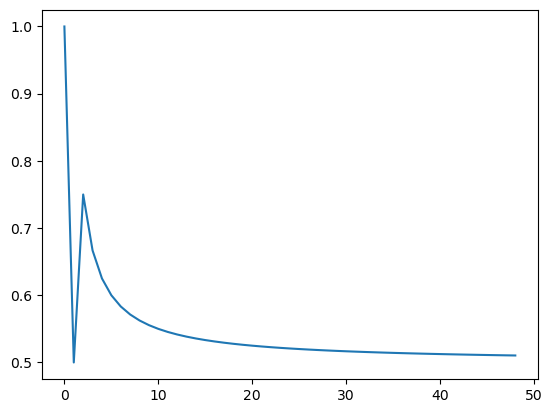

In [77]:
plt.plot(np.abs(v_coef_n_arr))
#plt.yscale('log')

In [56]:
def _v_sum_np(t_arr, i):
    """
    Generates the coefficient V for barycentric coordinates

    Parameters
    ----------
    t_arr : iterable of floats
        values of t
    i : int
        index of current point.

    Returns
    -------
    v_i : numpy.float64
        coefficient V.

    """
    n = len(t_arr)
    t_arr = np.array(t_arr, dtype = 'float64')
    h = round(np.max(t_arr)-np.min(t_arr))
    t_arr *= 4/h
    prod_coef = [ii for ii in range(n)]
    prod_coef.pop(i)
    indices = np.array(prod_coef, dtype = 'int')
    subst = t_arr[i] - t_arr
    v_i = np.prod(subst[indices])
    
    return n / v_i

In [57]:
_a = np.arange(10)

In [58]:
np.prod(_a[1:5])

24

In [59]:
_tau = LGR(200)

In [60]:
%%timeit
_v_sum(_tau,2)

1.16 ms ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
%%timeit
_v_sum_np(_tau,2)

454 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [66]:
_v_sum_np(_tau,2)

-0.2656247271922939

In [68]:
v_coef_coll(200,2, 'LGR')

-0.2656247271922939

In [ ]:
from chords.bu_pseudospectral import Integration_Matrix, Extreme_Matrix, Integration_Polynomial_Matrix

In [13]:
Integration_Polynomial_Matrix(2, 0, 'LG', 1, 16)

array([[ 0.5       , -0.07735027],
       [ 1.07735027,  0.5       ],
       [ 1.        ,  1.        ]])

In [6]:
schemes = ['LG', 'LGR', 'LGL'] #If you defined a custom function, name your scheme here
N_arr = [ii + 2 for ii in range(100)]
h_arr = [0.5, 1, 2, 5, 10]
results = {}
           
for N in N_arr:
    print(f'\tN = {N}')
    for scheme in schemes:
        for order in range(1,6):
            for h in h_arr:
                for deriv_order in range(order):
                    key = scheme + f'_{order}_h:{h}'
                    print(f'Problem: {key}, ', time.strftime('%H:%M:%S ', time.localtime(time.time())))
                    #try:
                    Integration_Matrix(N, scheme, deriv_order, h, scheme_order=order, precission=16)
                    #except: 
                    #    print('Integration matrix: ATTEMPT FAILED!!')
            try:
                for point in ['start','end']:
                    Extreme_Matrix(N, scheme, point, scheme_order = order, precission=16)
            except: 
                print('Extreme matrix: ATTEMPT FAILED!!')


	N = 2
Problem: LG_1_h:0.5,  13:59:34 
Problem: LG_1_h:1,  13:59:34 
Problem: LG_1_h:2,  13:59:34 
Problem: LG_1_h:5,  13:59:34 
Problem: LG_1_h:10,  13:59:34 
Problem: LG_2_h:0.5,  13:59:34 
Problem: LG_2_h:0.5,  13:59:34 
Problem: LG_2_h:1,  13:59:34 
Problem: LG_2_h:1,  13:59:34 
Problem: LG_2_h:2,  13:59:34 
Problem: LG_2_h:2,  13:59:34 
Problem: LG_2_h:5,  13:59:34 
Problem: LG_2_h:5,  13:59:34 
Problem: LG_2_h:10,  13:59:34 
Problem: LG_2_h:10,  13:59:34 
Problem: LG_3_h:0.5,  13:59:34 
Problem: LG_3_h:0.5,  13:59:34 
Problem: LG_3_h:0.5,  13:59:34 
Problem: LG_3_h:1,  13:59:34 
Problem: LG_3_h:1,  13:59:34 
Problem: LG_3_h:1,  13:59:34 
Problem: LG_3_h:2,  13:59:34 
Problem: LG_3_h:2,  13:59:34 
Problem: LG_3_h:2,  13:59:34 
Problem: LG_3_h:5,  13:59:34 
Problem: LG_3_h:5,  13:59:34 
Problem: LG_3_h:5,  13:59:34 
Problem: LG_3_h:10,  13:59:34 
Problem: LG_3_h:10,  13:59:34 
Problem: LG_3_h:10,  13:59:34 
Problem: LG_4_h:0.5,  13:59:34 
Problem: LG_4_h:0.5,  13:59:34 
Problem: LG

OSError: [Errno 28] No space left on device

Problem: LGR_2_h:2,  13:26:06 
Problem: LGR_2_h:5,  13:26:06 
Problem: LGR_2_h:5,  13:26:06 
Problem: LGR_2_h:10,  13:26:06 
Problem: LGR_2_h:10,  13:26:06 
Problem: LGR_3_h:0.5,  13:26:06 
Problem: LGR_3_h:0.5,  13:26:07 
Problem: LGR_3_h:0.5,  13:26:07 
Problem: LGR_3_h:1,  13:26:07 
Problem: LGR_3_h:1,  13:26:07 
Problem: LGR_3_h:1,  13:26:07 
Problem: LGR_3_h:2,  13:26:07 
Problem: LGR_3_h:2,  13:26:07 
Problem: LGR_3_h:2,  13:26:07 
Problem: LGR_3_h:5,  13:26:07 
Problem: LGR_3_h:5,  13:26:07 
Problem: LGR_3_h:5,  13:26:07 
Problem: LGR_3_h:10,  13:26:07 
Problem: LGR_3_h:10,  13:26:07 
Problem: LGR_3_h:10,  13:26:07 
Problem: LGR_4_h:0.5,  13:26:07 
Problem: LGR_4_h:0.5,  13:26:07 
Problem: LGR_4_h:0.5,  13:26:07 
Problem: LGR_4_h:0.5,  13:26:07 
Problem: LGR_4_h:1,  13:26:07 
Problem: LGR_4_h:1,  13:26:07 
Problem: LGR_4_h:1,  13:26:07 
Problem: LGR_4_h:1,  13:26:07 
Problem: LGR_4_h:2,  13:26:07 
Problem: LGR_4_h:2,  13:26:07 
Problem: LGR_4_h:2,  13:26:07 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:10,  13:26:14 
Problem: LGR_5_h:0.5,  13:26:14 
Problem: LGR_5_h:0.5,  13:26:14 
Problem: LGR_5_h:0.5,  13:26:14 
Problem: LGR_5_h:0.5,  13:26:14 
Problem: LGR_5_h:0.5,  13:26:14 
Problem: LGR_5_h:1,  13:26:14 
Problem: LGR_5_h:1,  13:26:15 
Problem: LGR_5_h:1,  13:26:15 
Problem: LGR_5_h:1,  13:26:15 
Problem: LGR_5_h:1,  13:26:15 
Problem: LGR_5_h:2,  13:26:15 
Problem: LGR_5_h:2,  13:26:15 
Problem: LGR_5_h:2,  13:26:15 
Problem: LGR_5_h:2,  13:26:15 
Problem: LGR_5_h:2,  13:26:15 
Problem: LGR_5_h:5,  13:26:15 
Problem: LGR_5_h:5,  13:26:15 
Problem: LGR_5_h:5,  13:26:15 
Problem: LGR_5_h:5,  13:26:15 
Problem: LGR_5_h:5,  13:26:15 
Problem: LGR_5_h:10,  13:26:15 
Problem: LGR_5_h:10,  13:26:15 
Problem: LGR_5_h:10,  13:26:15 
Problem: LGR_5_h:10,  13:26:15 
Problem: LGR_5_h:10,  13:26:15 
Problem: LGL_1_h:0.5,  13:26:15 
Problem: LGL_1_h:1,  13:26:15 
Problem: LGL_1_h:2,  13:26:15 
Problem: LGL_1_h:5,  13:26:15 
Problem: LGL_1_h:10,  13:26:15 
Problem: LGL_2_h:0.5

Problem: LGL_3_h:0.5,  13:26:23 
Problem: LGL_3_h:0.5,  13:26:23 
Problem: LGL_3_h:0.5,  13:26:23 
Problem: LGL_3_h:1,  13:26:23 
Problem: LGL_3_h:1,  13:26:23 
Problem: LGL_3_h:1,  13:26:23 
Problem: LGL_3_h:2,  13:26:23 
Problem: LGL_3_h:2,  13:26:23 
Problem: LGL_3_h:2,  13:26:24 
Problem: LGL_3_h:5,  13:26:24 
Problem: LGL_3_h:5,  13:26:24 
Problem: LGL_3_h:5,  13:26:24 
Problem: LGL_3_h:10,  13:26:24 
Problem: LGL_3_h:10,  13:26:24 
Problem: LGL_3_h:10,  13:26:24 
Problem: LGL_4_h:0.5,  13:26:24 
Problem: LGL_4_h:0.5,  13:26:24 
Problem: LGL_4_h:0.5,  13:26:24 
Problem: LGL_4_h:0.5,  13:26:24 
Problem: LGL_4_h:1,  13:26:24 
Problem: LGL_4_h:1,  13:26:24 
Problem: LGL_4_h:1,  13:26:24 
Problem: LGL_4_h:1,  13:26:24 
Problem: LGL_4_h:2,  13:26:24 
Problem: LGL_4_h:2,  13:26:24 
Problem: LGL_4_h:2,  13:26:24 
Problem: LGL_4_h:2,  13:26:24 
Problem: LGL_4_h:5,  13:26:24 
Problem: LGL_4_h:5,  13:26:24 
Problem: LGL_4_h:5,  13:26:24 
Problem: LGL_4_h:5,  13:26:24 
Problem: LGL_4_h:10,  

Problem: LGL_5_h:1,  13:26:33 
Problem: LGL_5_h:1,  13:26:33 
Problem: LGL_5_h:2,  13:26:33 
Problem: LGL_5_h:2,  13:26:33 
Problem: LGL_5_h:2,  13:26:34 
Problem: LGL_5_h:2,  13:26:34 
Problem: LGL_5_h:2,  13:26:34 
Problem: LGL_5_h:5,  13:26:34 
Problem: LGL_5_h:5,  13:26:34 
Problem: LGL_5_h:5,  13:26:34 
Problem: LGL_5_h:5,  13:26:34 
Problem: LGL_5_h:5,  13:26:34 
Problem: LGL_5_h:10,  13:26:34 
Problem: LGL_5_h:10,  13:26:34 
Problem: LGL_5_h:10,  13:26:34 
Problem: LGL_5_h:10,  13:26:34 
Problem: LGL_5_h:10,  13:26:34 
	N = 19
Problem: LG_1_h:0.5,  13:26:34 
Problem: LG_1_h:1,  13:26:34 
Problem: LG_1_h:2,  13:26:34 
Problem: LG_1_h:5,  13:26:34 
Problem: LG_1_h:10,  13:26:34 
Problem: LG_2_h:0.5,  13:26:34 
Problem: LG_2_h:0.5,  13:26:34 
Problem: LG_2_h:1,  13:26:34 
Problem: LG_2_h:1,  13:26:34 
Problem: LG_2_h:2,  13:26:34 
Problem: LG_2_h:2,  13:26:34 
Problem: LG_2_h:5,  13:26:34 
Problem: LG_2_h:5,  13:26:34 
Problem: LG_2_h:10,  13:26:34 
Problem: LG_2_h:10,  13:26:35 
P

Problem: LG_3_h:2,  13:26:44 
Problem: LG_3_h:2,  13:26:44 
Problem: LG_3_h:2,  13:26:45 
Problem: LG_3_h:5,  13:26:45 
Problem: LG_3_h:5,  13:26:45 
Problem: LG_3_h:5,  13:26:45 
Problem: LG_3_h:10,  13:26:45 
Problem: LG_3_h:10,  13:26:45 
Problem: LG_3_h:10,  13:26:45 
Problem: LG_4_h:0.5,  13:26:45 
Problem: LG_4_h:0.5,  13:26:45 
Problem: LG_4_h:0.5,  13:26:45 
Problem: LG_4_h:0.5,  13:26:45 
Problem: LG_4_h:1,  13:26:45 
Problem: LG_4_h:1,  13:26:45 
Problem: LG_4_h:1,  13:26:45 
Problem: LG_4_h:1,  13:26:45 
Problem: LG_4_h:2,  13:26:45 
Problem: LG_4_h:2,  13:26:45 
Problem: LG_4_h:2,  13:26:45 
Problem: LG_4_h:2,  13:26:45 
Problem: LG_4_h:5,  13:26:45 
Problem: LG_4_h:5,  13:26:46 
Problem: LG_4_h:5,  13:26:46 
Problem: LG_4_h:5,  13:26:46 
Problem: LG_4_h:10,  13:26:46 
Problem: LG_4_h:10,  13:26:46 
Problem: LG_4_h:10,  13:26:46 
Problem: LG_4_h:10,  13:26:46 
Problem: LG_5_h:0.5,  13:26:46 
Problem: LG_5_h:0.5,  13:26:46 
Problem: LG_5_h:0.5,  13:26:46 
Problem: LG_5_h:0.5

Problem: LG_5_h:2,  13:26:57 
Problem: LG_5_h:5,  13:26:57 
Problem: LG_5_h:5,  13:26:57 
Problem: LG_5_h:5,  13:26:57 
Problem: LG_5_h:5,  13:26:57 
Problem: LG_5_h:5,  13:26:58 
Problem: LG_5_h:10,  13:26:58 
Problem: LG_5_h:10,  13:26:58 
Problem: LG_5_h:10,  13:26:58 
Problem: LG_5_h:10,  13:26:58 
Problem: LG_5_h:10,  13:26:58 
Problem: LGR_1_h:0.5,  13:26:58 
Problem: LGR_1_h:1,  13:26:58 
Problem: LGR_1_h:2,  13:26:58 
Problem: LGR_1_h:5,  13:26:58 
Problem: LGR_1_h:10,  13:26:58 
Problem: LGR_2_h:0.5,  13:26:58 
Problem: LGR_2_h:0.5,  13:26:58 
Problem: LGR_2_h:1,  13:26:58 
Problem: LGR_2_h:1,  13:26:58 
Problem: LGR_2_h:2,  13:26:58 
Problem: LGR_2_h:2,  13:26:58 
Problem: LGR_2_h:5,  13:26:58 
Problem: LGR_2_h:5,  13:26:58 
Problem: LGR_2_h:10,  13:26:58 
Problem: LGR_2_h:10,  13:26:58 
Problem: LGR_3_h:0.5,  13:26:58 
Problem: LGR_3_h:0.5,  13:26:59 
Problem: LGR_3_h:0.5,  13:26:59 
Problem: LGR_3_h:1,  13:26:59 
Problem: LGR_3_h:1,  13:26:59 
Problem: LGR_3_h:1,  13:26:59 

Problem: LGR_3_h:10,  13:27:11 
Problem: LGR_3_h:10,  13:27:11 
Problem: LGR_4_h:0.5,  13:27:11 
Problem: LGR_4_h:0.5,  13:27:11 
Problem: LGR_4_h:0.5,  13:27:11 
Problem: LGR_4_h:0.5,  13:27:12 
Problem: LGR_4_h:1,  13:27:12 
Problem: LGR_4_h:1,  13:27:12 
Problem: LGR_4_h:1,  13:27:12 
Problem: LGR_4_h:1,  13:27:12 
Problem: LGR_4_h:2,  13:27:12 
Problem: LGR_4_h:2,  13:27:12 
Problem: LGR_4_h:2,  13:27:12 
Problem: LGR_4_h:2,  13:27:12 
Problem: LGR_4_h:5,  13:27:12 
Problem: LGR_4_h:5,  13:27:12 
Problem: LGR_4_h:5,  13:27:12 
Problem: LGR_4_h:5,  13:27:12 
Problem: LGR_4_h:10,  13:27:12 
Problem: LGR_4_h:10,  13:27:12 
Problem: LGR_4_h:10,  13:27:12 
Problem: LGR_4_h:10,  13:27:12 
Problem: LGR_5_h:0.5,  13:27:12 
Problem: LGR_5_h:0.5,  13:27:13 
Problem: LGR_5_h:0.5,  13:27:13 
Problem: LGR_5_h:0.5,  13:27:13 
Problem: LGR_5_h:0.5,  13:27:13 
Problem: LGR_5_h:1,  13:27:13 
Problem: LGR_5_h:1,  13:27:13 
Problem: LGR_5_h:1,  13:27:13 
Problem: LGR_5_h:1,  13:27:13 
Problem: LGR_5_

Problem: LGR_5_h:5,  13:27:26 
Problem: LGR_5_h:5,  13:27:26 
Problem: LGR_5_h:10,  13:27:26 
Problem: LGR_5_h:10,  13:27:26 
Problem: LGR_5_h:10,  13:27:26 
Problem: LGR_5_h:10,  13:27:27 
Problem: LGR_5_h:10,  13:27:27 
Problem: LGL_1_h:0.5,  13:27:27 
Problem: LGL_1_h:1,  13:27:27 
Problem: LGL_1_h:2,  13:27:27 
Problem: LGL_1_h:5,  13:27:27 
Problem: LGL_1_h:10,  13:27:27 
Problem: LGL_2_h:0.5,  13:27:27 
Problem: LGL_2_h:0.5,  13:27:27 
Problem: LGL_2_h:1,  13:27:27 
Problem: LGL_2_h:1,  13:27:27 
Problem: LGL_2_h:2,  13:27:27 
Problem: LGL_2_h:2,  13:27:27 
Problem: LGL_2_h:5,  13:27:27 
Problem: LGL_2_h:5,  13:27:27 
Problem: LGL_2_h:10,  13:27:27 
Problem: LGL_2_h:10,  13:27:27 
Problem: LGL_3_h:0.5,  13:27:27 
Problem: LGL_3_h:0.5,  13:27:28 
Problem: LGL_3_h:0.5,  13:27:28 
Problem: LGL_3_h:1,  13:27:28 
Problem: LGL_3_h:1,  13:27:28 
Problem: LGL_3_h:1,  13:27:28 
Problem: LGL_3_h:2,  13:27:28 
Problem: LGL_3_h:2,  13:27:28 
Problem: LGL_3_h:2,  13:27:28 
Problem: LGL_3_h:5,

Problem: LGL_4_h:0.5,  13:27:43 
Problem: LGL_4_h:0.5,  13:27:43 
Problem: LGL_4_h:0.5,  13:27:43 
Problem: LGL_4_h:1,  13:27:44 
Problem: LGL_4_h:1,  13:27:44 
Problem: LGL_4_h:1,  13:27:44 
Problem: LGL_4_h:1,  13:27:44 
Problem: LGL_4_h:2,  13:27:44 
Problem: LGL_4_h:2,  13:27:44 
Problem: LGL_4_h:2,  13:27:44 
Problem: LGL_4_h:2,  13:27:44 
Problem: LGL_4_h:5,  13:27:44 
Problem: LGL_4_h:5,  13:27:44 
Problem: LGL_4_h:5,  13:27:44 
Problem: LGL_4_h:5,  13:27:44 
Problem: LGL_4_h:10,  13:27:44 
Problem: LGL_4_h:10,  13:27:44 
Problem: LGL_4_h:10,  13:27:44 
Problem: LGL_4_h:10,  13:27:44 
Problem: LGL_5_h:0.5,  13:27:44 
Problem: LGL_5_h:0.5,  13:27:45 
Problem: LGL_5_h:0.5,  13:27:45 
Problem: LGL_5_h:0.5,  13:27:45 
Problem: LGL_5_h:0.5,  13:27:45 
Problem: LGL_5_h:1,  13:27:45 
Problem: LGL_5_h:1,  13:27:45 
Problem: LGL_5_h:1,  13:27:45 
Problem: LGL_5_h:1,  13:27:45 
Problem: LGL_5_h:1,  13:27:45 
Problem: LGL_5_h:2,  13:27:45 
Problem: LGL_5_h:2,  13:27:45 
Problem: LGL_5_h:2,

Problem: LGL_5_h:10,  13:28:01 
Problem: LGL_5_h:10,  13:28:01 
Problem: LGL_5_h:10,  13:28:01 
Problem: LGL_5_h:10,  13:28:01 
Problem: LGL_5_h:10,  13:28:01 
	N = 26
Problem: LG_1_h:0.5,  13:28:02 
Problem: LG_1_h:1,  13:28:02 
Problem: LG_1_h:2,  13:28:02 
Problem: LG_1_h:5,  13:28:02 
Problem: LG_1_h:10,  13:28:02 
Problem: LG_2_h:0.5,  13:28:02 
Problem: LG_2_h:0.5,  13:28:02 
Problem: LG_2_h:1,  13:28:02 
Problem: LG_2_h:1,  13:28:02 
Problem: LG_2_h:2,  13:28:02 
Problem: LG_2_h:2,  13:28:02 
Problem: LG_2_h:5,  13:28:02 
Problem: LG_2_h:5,  13:28:02 
Problem: LG_2_h:10,  13:28:03 
Problem: LG_2_h:10,  13:28:03 
Problem: LG_3_h:0.5,  13:28:03 
Problem: LG_3_h:0.5,  13:28:03 
Problem: LG_3_h:0.5,  13:28:03 
Problem: LG_3_h:1,  13:28:03 
Problem: LG_3_h:1,  13:28:03 
Problem: LG_3_h:1,  13:28:03 
Problem: LG_3_h:2,  13:28:03 
Problem: LG_3_h:2,  13:28:03 
Problem: LG_3_h:2,  13:28:03 
Problem: LG_3_h:5,  13:28:03 
Problem: LG_3_h:5,  13:28:03 
Problem: LG_3_h:5,  13:28:03 
Problem

Problem: LG_4_h:1,  13:28:22 
Problem: LG_4_h:1,  13:28:22 
Problem: LG_4_h:1,  13:28:22 
Problem: LG_4_h:2,  13:28:22 
Problem: LG_4_h:2,  13:28:22 
Problem: LG_4_h:2,  13:28:22 
Problem: LG_4_h:2,  13:28:22 
Problem: LG_4_h:5,  13:28:22 
Problem: LG_4_h:5,  13:28:22 
Problem: LG_4_h:5,  13:28:22 
Problem: LG_4_h:5,  13:28:22 
Problem: LG_4_h:10,  13:28:22 
Problem: LG_4_h:10,  13:28:22 
Problem: LG_4_h:10,  13:28:22 
Problem: LG_4_h:10,  13:28:22 
Problem: LG_5_h:0.5,  13:28:22 
Problem: LG_5_h:0.5,  13:28:23 
Problem: LG_5_h:0.5,  13:28:23 
Problem: LG_5_h:0.5,  13:28:24 
Problem: LG_5_h:0.5,  13:28:24 
Problem: LG_5_h:1,  13:28:24 
Problem: LG_5_h:1,  13:28:24 
Problem: LG_5_h:1,  13:28:24 
Problem: LG_5_h:1,  13:28:24 
Problem: LG_5_h:1,  13:28:24 
Problem: LG_5_h:2,  13:28:24 
Problem: LG_5_h:2,  13:28:24 
Problem: LG_5_h:2,  13:28:24 
Problem: LG_5_h:2,  13:28:24 
Problem: LG_5_h:2,  13:28:24 
Problem: LG_5_h:5,  13:28:24 
Problem: LG_5_h:5,  13:28:24 
Problem: LG_5_h:5,  13:28:

Problem: LGR_1_h:0.5,  13:28:44 
Problem: LGR_1_h:1,  13:28:44 
Problem: LGR_1_h:2,  13:28:44 
Problem: LGR_1_h:5,  13:28:44 
Problem: LGR_1_h:10,  13:28:44 
Problem: LGR_2_h:0.5,  13:28:44 
Problem: LGR_2_h:0.5,  13:28:44 
Problem: LGR_2_h:1,  13:28:45 
Problem: LGR_2_h:1,  13:28:45 
Problem: LGR_2_h:2,  13:28:45 
Problem: LGR_2_h:2,  13:28:45 
Problem: LGR_2_h:5,  13:28:45 
Problem: LGR_2_h:5,  13:28:45 
Problem: LGR_2_h:10,  13:28:45 
Problem: LGR_2_h:10,  13:28:45 
Problem: LGR_3_h:0.5,  13:28:45 
Problem: LGR_3_h:0.5,  13:28:45 
Problem: LGR_3_h:0.5,  13:28:46 
Problem: LGR_3_h:1,  13:28:46 
Problem: LGR_3_h:1,  13:28:46 
Problem: LGR_3_h:1,  13:28:46 
Problem: LGR_3_h:2,  13:28:46 
Problem: LGR_3_h:2,  13:28:46 
Problem: LGR_3_h:2,  13:28:46 
Problem: LGR_3_h:5,  13:28:46 
Problem: LGR_3_h:5,  13:28:46 
Problem: LGR_3_h:5,  13:28:46 
Problem: LGR_3_h:10,  13:28:46 
Problem: LGR_3_h:10,  13:28:46 
Problem: LGR_3_h:10,  13:28:46 
Problem: LGR_4_h:0.5,  13:28:46 
Problem: LGR_4_h:0.

Problem: LGR_4_h:2,  13:29:08 
Problem: LGR_4_h:2,  13:29:08 
Problem: LGR_4_h:2,  13:29:08 
Problem: LGR_4_h:5,  13:29:08 
Problem: LGR_4_h:5,  13:29:08 
Problem: LGR_4_h:5,  13:29:08 
Problem: LGR_4_h:5,  13:29:09 
Problem: LGR_4_h:10,  13:29:09 
Problem: LGR_4_h:10,  13:29:09 
Problem: LGR_4_h:10,  13:29:09 
Problem: LGR_4_h:10,  13:29:09 
Problem: LGR_5_h:0.5,  13:29:09 
Problem: LGR_5_h:0.5,  13:29:10 
Problem: LGR_5_h:0.5,  13:29:10 
Problem: LGR_5_h:0.5,  13:29:10 
Problem: LGR_5_h:0.5,  13:29:10 
Problem: LGR_5_h:1,  13:29:10 
Problem: LGR_5_h:1,  13:29:10 
Problem: LGR_5_h:1,  13:29:10 
Problem: LGR_5_h:1,  13:29:10 
Problem: LGR_5_h:1,  13:29:10 
Problem: LGR_5_h:2,  13:29:10 
Problem: LGR_5_h:2,  13:29:10 
Problem: LGR_5_h:2,  13:29:10 
Problem: LGR_5_h:2,  13:29:10 
Problem: LGR_5_h:2,  13:29:10 
Problem: LGR_5_h:5,  13:29:11 
Problem: LGR_5_h:5,  13:29:11 
Problem: LGR_5_h:5,  13:29:11 
Problem: LGR_5_h:5,  13:29:11 
Problem: LGR_5_h:5,  13:29:11 
Problem: LGR_5_h:10,  13:

Problem: LGL_1_h:1,  13:29:34 
Problem: LGL_1_h:2,  13:29:34 
Problem: LGL_1_h:5,  13:29:34 
Problem: LGL_1_h:10,  13:29:34 
Problem: LGL_2_h:0.5,  13:29:34 
Problem: LGL_2_h:0.5,  13:29:34 
Problem: LGL_2_h:1,  13:29:34 
Problem: LGL_2_h:1,  13:29:34 
Problem: LGL_2_h:2,  13:29:35 
Problem: LGL_2_h:2,  13:29:35 
Problem: LGL_2_h:5,  13:29:35 
Problem: LGL_2_h:5,  13:29:35 
Problem: LGL_2_h:10,  13:29:35 
Problem: LGL_2_h:10,  13:29:35 
Problem: LGL_3_h:0.5,  13:29:35 
Problem: LGL_3_h:0.5,  13:29:36 
Problem: LGL_3_h:0.5,  13:29:36 
Problem: LGL_3_h:1,  13:29:36 
Problem: LGL_3_h:1,  13:29:36 
Problem: LGL_3_h:1,  13:29:36 
Problem: LGL_3_h:2,  13:29:36 
Problem: LGL_3_h:2,  13:29:36 
Problem: LGL_3_h:2,  13:29:36 
Problem: LGL_3_h:5,  13:29:36 
Problem: LGL_3_h:5,  13:29:36 
Problem: LGL_3_h:5,  13:29:36 
Problem: LGL_3_h:10,  13:29:36 
Problem: LGL_3_h:10,  13:29:36 
Problem: LGL_3_h:10,  13:29:36 
Problem: LGL_4_h:0.5,  13:29:36 
Problem: LGL_4_h:0.5,  13:29:37 
Problem: LGL_4_h:0.

Problem: LGL_4_h:2,  13:30:02 
Problem: LGL_4_h:2,  13:30:02 
Problem: LGL_4_h:2,  13:30:02 
Problem: LGL_4_h:2,  13:30:02 
Problem: LGL_4_h:5,  13:30:02 
Problem: LGL_4_h:5,  13:30:02 
Problem: LGL_4_h:5,  13:30:02 
Problem: LGL_4_h:5,  13:30:02 
Problem: LGL_4_h:10,  13:30:02 
Problem: LGL_4_h:10,  13:30:03 
Problem: LGL_4_h:10,  13:30:03 
Problem: LGL_4_h:10,  13:30:03 
Problem: LGL_5_h:0.5,  13:30:03 
Problem: LGL_5_h:0.5,  13:30:04 
Problem: LGL_5_h:0.5,  13:30:04 
Problem: LGL_5_h:0.5,  13:30:04 
Problem: LGL_5_h:0.5,  13:30:05 
Problem: LGL_5_h:1,  13:30:05 
Problem: LGL_5_h:1,  13:30:05 
Problem: LGL_5_h:1,  13:30:05 
Problem: LGL_5_h:1,  13:30:05 
Problem: LGL_5_h:1,  13:30:05 
Problem: LGL_5_h:2,  13:30:05 
Problem: LGL_5_h:2,  13:30:05 
Problem: LGL_5_h:2,  13:30:05 
Problem: LGL_5_h:2,  13:30:05 
Problem: LGL_5_h:2,  13:30:05 
Problem: LGL_5_h:5,  13:30:05 
Problem: LGL_5_h:5,  13:30:05 
Problem: LGL_5_h:5,  13:30:05 
Problem: LGL_5_h:5,  13:30:05 
Problem: LGL_5_h:5,  13:3

	N = 33
Problem: LG_1_h:0.5,  13:30:32 
Problem: LG_1_h:1,  13:30:32 
Problem: LG_1_h:2,  13:30:32 
Problem: LG_1_h:5,  13:30:32 
Problem: LG_1_h:10,  13:30:32 
Problem: LG_2_h:0.5,  13:30:33 
Problem: LG_2_h:0.5,  13:30:33 
Problem: LG_2_h:1,  13:30:33 
Problem: LG_2_h:1,  13:30:33 
Problem: LG_2_h:2,  13:30:33 
Problem: LG_2_h:2,  13:30:33 
Problem: LG_2_h:5,  13:30:33 
Problem: LG_2_h:5,  13:30:33 
Problem: LG_2_h:10,  13:30:34 
Problem: LG_2_h:10,  13:30:34 
Problem: LG_3_h:0.5,  13:30:34 
Problem: LG_3_h:0.5,  13:30:34 
Problem: LG_3_h:0.5,  13:30:35 
Problem: LG_3_h:1,  13:30:35 
Problem: LG_3_h:1,  13:30:35 
Problem: LG_3_h:1,  13:30:35 
Problem: LG_3_h:2,  13:30:35 
Problem: LG_3_h:2,  13:30:35 
Problem: LG_3_h:2,  13:30:35 
Problem: LG_3_h:5,  13:30:35 
Problem: LG_3_h:5,  13:30:35 
Problem: LG_3_h:5,  13:30:35 
Problem: LG_3_h:10,  13:30:35 
Problem: LG_3_h:10,  13:30:35 
Problem: LG_3_h:10,  13:30:35 
Problem: LG_4_h:0.5,  13:30:35 
Problem: LG_4_h:0.5,  13:30:36 
Problem: L

Problem: LG_4_h:2,  13:31:05 
Problem: LG_4_h:2,  13:31:05 
Problem: LG_4_h:5,  13:31:06 
Problem: LG_4_h:5,  13:31:06 
Problem: LG_4_h:5,  13:31:06 
Problem: LG_4_h:5,  13:31:06 
Problem: LG_4_h:10,  13:31:06 
Problem: LG_4_h:10,  13:31:06 
Problem: LG_4_h:10,  13:31:06 
Problem: LG_4_h:10,  13:31:06 
Problem: LG_5_h:0.5,  13:31:06 
Problem: LG_5_h:0.5,  13:31:07 
Problem: LG_5_h:0.5,  13:31:08 
Problem: LG_5_h:0.5,  13:31:08 
Problem: LG_5_h:0.5,  13:31:08 
Problem: LG_5_h:1,  13:31:08 
Problem: LG_5_h:1,  13:31:08 
Problem: LG_5_h:1,  13:31:08 
Problem: LG_5_h:1,  13:31:08 
Problem: LG_5_h:1,  13:31:08 
Problem: LG_5_h:2,  13:31:08 
Problem: LG_5_h:2,  13:31:08 
Problem: LG_5_h:2,  13:31:08 
Problem: LG_5_h:2,  13:31:08 
Problem: LG_5_h:2,  13:31:09 
Problem: LG_5_h:5,  13:31:09 
Problem: LG_5_h:5,  13:31:09 
Problem: LG_5_h:5,  13:31:09 
Problem: LG_5_h:5,  13:31:09 
Problem: LG_5_h:5,  13:31:09 
Problem: LG_5_h:10,  13:31:09 
Problem: LG_5_h:10,  13:31:09 
Problem: LG_5_h:10,  13:

Problem: LGR_1_h:10,  13:31:40 
Problem: LGR_2_h:0.5,  13:31:40 
Problem: LGR_2_h:0.5,  13:31:41 
Problem: LGR_2_h:1,  13:31:41 
Problem: LGR_2_h:1,  13:31:41 
Problem: LGR_2_h:2,  13:31:41 
Problem: LGR_2_h:2,  13:31:41 
Problem: LGR_2_h:5,  13:31:41 
Problem: LGR_2_h:5,  13:31:42 
Problem: LGR_2_h:10,  13:31:42 
Problem: LGR_2_h:10,  13:31:42 
Problem: LGR_3_h:0.5,  13:31:42 
Problem: LGR_3_h:0.5,  13:31:43 
Problem: LGR_3_h:0.5,  13:31:43 
Problem: LGR_3_h:1,  13:31:43 
Problem: LGR_3_h:1,  13:31:43 
Problem: LGR_3_h:1,  13:31:43 
Problem: LGR_3_h:2,  13:31:43 
Problem: LGR_3_h:2,  13:31:43 
Problem: LGR_3_h:2,  13:31:43 
Problem: LGR_3_h:5,  13:31:43 
Problem: LGR_3_h:5,  13:31:43 
Problem: LGR_3_h:5,  13:31:43 
Problem: LGR_3_h:10,  13:31:44 
Problem: LGR_3_h:10,  13:31:44 
Problem: LGR_3_h:10,  13:31:44 
Problem: LGR_4_h:0.5,  13:31:44 
Problem: LGR_4_h:0.5,  13:31:45 
Problem: LGR_4_h:0.5,  13:31:45 
Problem: LGR_4_h:0.5,  13:31:45 
Problem: LGR_4_h:1,  13:31:45 
Problem: LGR_4_

Problem: LGR_4_h:5,  13:32:19 
Problem: LGR_4_h:5,  13:32:19 
Problem: LGR_4_h:5,  13:32:19 
Problem: LGR_4_h:5,  13:32:19 
Problem: LGR_4_h:10,  13:32:19 
Problem: LGR_4_h:10,  13:32:19 
Problem: LGR_4_h:10,  13:32:19 
Problem: LGR_4_h:10,  13:32:19 
Problem: LGR_5_h:0.5,  13:32:20 
Problem: LGR_5_h:0.5,  13:32:21 
Problem: LGR_5_h:0.5,  13:32:21 
Problem: LGR_5_h:0.5,  13:32:21 
Problem: LGR_5_h:0.5,  13:32:21 
Problem: LGR_5_h:1,  13:32:22 
Problem: LGR_5_h:1,  13:32:22 
Problem: LGR_5_h:1,  13:32:22 
Problem: LGR_5_h:1,  13:32:22 
Problem: LGR_5_h:1,  13:32:22 
Problem: LGR_5_h:2,  13:32:22 
Problem: LGR_5_h:2,  13:32:22 
Problem: LGR_5_h:2,  13:32:22 
Problem: LGR_5_h:2,  13:32:22 
Problem: LGR_5_h:2,  13:32:22 
Problem: LGR_5_h:5,  13:32:22 
Problem: LGR_5_h:5,  13:32:22 
Problem: LGR_5_h:5,  13:32:23 
Problem: LGR_5_h:5,  13:32:23 
Problem: LGR_5_h:5,  13:32:23 
Problem: LGR_5_h:10,  13:32:23 
Problem: LGR_5_h:10,  13:32:23 
Problem: LGR_5_h:10,  13:32:23 
Problem: LGR_5_h:10,  

Problem: LGL_1_h:10,  13:32:59 
Problem: LGL_2_h:0.5,  13:32:59 
Problem: LGL_2_h:0.5,  13:33:00 
Problem: LGL_2_h:1,  13:33:00 
Problem: LGL_2_h:1,  13:33:00 
Problem: LGL_2_h:2,  13:33:00 
Problem: LGL_2_h:2,  13:33:00 
Problem: LGL_2_h:5,  13:33:00 
Problem: LGL_2_h:5,  13:33:01 
Problem: LGL_2_h:10,  13:33:01 
Problem: LGL_2_h:10,  13:33:01 
Problem: LGL_3_h:0.5,  13:33:01 
Problem: LGL_3_h:0.5,  13:33:02 
Problem: LGL_3_h:0.5,  13:33:02 
Problem: LGL_3_h:1,  13:33:02 
Problem: LGL_3_h:1,  13:33:02 
Problem: LGL_3_h:1,  13:33:02 
Problem: LGL_3_h:2,  13:33:02 
Problem: LGL_3_h:2,  13:33:02 
Problem: LGL_3_h:2,  13:33:03 
Problem: LGL_3_h:5,  13:33:03 
Problem: LGL_3_h:5,  13:33:03 
Problem: LGL_3_h:5,  13:33:03 
Problem: LGL_3_h:10,  13:33:03 
Problem: LGL_3_h:10,  13:33:03 
Problem: LGL_3_h:10,  13:33:03 
Problem: LGL_4_h:0.5,  13:33:03 
Problem: LGL_4_h:0.5,  13:33:05 
Problem: LGL_4_h:0.5,  13:33:06 
Problem: LGL_4_h:0.5,  13:33:06 
Problem: LGL_4_h:1,  13:33:06 
Problem: LGL_4_

Problem: LGL_4_h:5,  13:33:44 
Problem: LGL_4_h:5,  13:33:44 
Problem: LGL_4_h:5,  13:33:44 
Problem: LGL_4_h:5,  13:33:44 
Problem: LGL_4_h:10,  13:33:44 
Problem: LGL_4_h:10,  13:33:44 
Problem: LGL_4_h:10,  13:33:44 
Problem: LGL_4_h:10,  13:33:45 
Problem: LGL_5_h:0.5,  13:33:45 
Problem: LGL_5_h:0.5,  13:33:46 
Problem: LGL_5_h:0.5,  13:33:47 
Problem: LGL_5_h:0.5,  13:33:47 
Problem: LGL_5_h:0.5,  13:33:47 
Problem: LGL_5_h:1,  13:33:47 
Problem: LGL_5_h:1,  13:33:47 
Problem: LGL_5_h:1,  13:33:48 
Problem: LGL_5_h:1,  13:33:48 
Problem: LGL_5_h:1,  13:33:48 
Problem: LGL_5_h:2,  13:33:48 
Problem: LGL_5_h:2,  13:33:48 
Problem: LGL_5_h:2,  13:33:48 
Problem: LGL_5_h:2,  13:33:49 
Problem: LGL_5_h:2,  13:33:49 
Problem: LGL_5_h:5,  13:33:49 
Problem: LGL_5_h:5,  13:33:49 
Problem: LGL_5_h:5,  13:33:49 
Problem: LGL_5_h:5,  13:33:49 
Problem: LGL_5_h:5,  13:33:49 
Problem: LGL_5_h:10,  13:33:49 
Problem: LGL_5_h:10,  13:33:49 
Problem: LGL_5_h:10,  13:33:49 
Problem: LGL_5_h:10,  

Problem: LG_1_h:10,  13:34:30 
Problem: LG_2_h:0.5,  13:34:30 
Problem: LG_2_h:0.5,  13:34:32 
Problem: LG_2_h:1,  13:34:32 
Problem: LG_2_h:1,  13:34:32 
Problem: LG_2_h:2,  13:34:32 
Problem: LG_2_h:2,  13:34:32 
Problem: LG_2_h:5,  13:34:33 
Problem: LG_2_h:5,  13:34:33 
Problem: LG_2_h:10,  13:34:33 
Problem: LG_2_h:10,  13:34:33 
Problem: LG_3_h:0.5,  13:34:33 
Problem: LG_3_h:0.5,  13:34:34 
Problem: LG_3_h:0.5,  13:34:34 
Problem: LG_3_h:1,  13:34:34 
Problem: LG_3_h:1,  13:34:35 
Problem: LG_3_h:1,  13:34:35 
Problem: LG_3_h:2,  13:34:35 
Problem: LG_3_h:2,  13:34:35 
Problem: LG_3_h:2,  13:34:35 
Problem: LG_3_h:5,  13:34:35 
Problem: LG_3_h:5,  13:34:35 
Problem: LG_3_h:5,  13:34:35 
Problem: LG_3_h:10,  13:34:35 
Problem: LG_3_h:10,  13:34:35 
Problem: LG_3_h:10,  13:34:36 
Problem: LG_4_h:0.5,  13:34:36 
Problem: LG_4_h:0.5,  13:34:37 
Problem: LG_4_h:0.5,  13:34:37 
Problem: LG_4_h:0.5,  13:34:38 
Problem: LG_4_h:1,  13:34:38 
Problem: LG_4_h:1,  13:34:38 
Problem: LG_4_h:

Problem: LG_4_h:5,  13:35:22 
Problem: LG_4_h:5,  13:35:22 
Problem: LG_4_h:10,  13:35:23 
Problem: LG_4_h:10,  13:35:23 
Problem: LG_4_h:10,  13:35:23 
Problem: LG_4_h:10,  13:35:23 
Problem: LG_5_h:0.5,  13:35:23 
Problem: LG_5_h:0.5,  13:35:25 
Problem: LG_5_h:0.5,  13:35:25 
Problem: LG_5_h:0.5,  13:35:26 
Problem: LG_5_h:0.5,  13:35:26 
Problem: LG_5_h:1,  13:35:26 
Problem: LG_5_h:1,  13:35:26 
Problem: LG_5_h:1,  13:35:26 
Problem: LG_5_h:1,  13:35:26 
Problem: LG_5_h:1,  13:35:26 
Problem: LG_5_h:2,  13:35:26 
Problem: LG_5_h:2,  13:35:26 
Problem: LG_5_h:2,  13:35:26 
Problem: LG_5_h:2,  13:35:27 
Problem: LG_5_h:2,  13:35:27 
Problem: LG_5_h:5,  13:35:27 
Problem: LG_5_h:5,  13:35:27 
Problem: LG_5_h:5,  13:35:27 
Problem: LG_5_h:5,  13:35:27 
Problem: LG_5_h:5,  13:35:27 
Problem: LG_5_h:10,  13:35:27 
Problem: LG_5_h:10,  13:35:27 
Problem: LG_5_h:10,  13:35:28 
Problem: LG_5_h:10,  13:35:28 
Problem: LG_5_h:10,  13:35:28 
Problem: LGR_1_h:0.5,  13:35:28 
Problem: LGR_1_h:1

Problem: LGR_2_h:1,  13:36:22 
Problem: LGR_2_h:2,  13:36:22 
Problem: LGR_2_h:2,  13:36:22 
Problem: LGR_2_h:5,  13:36:22 
Problem: LGR_2_h:5,  13:36:22 
Problem: LGR_2_h:10,  13:36:23 
Problem: LGR_2_h:10,  13:36:23 
Problem: LGR_3_h:0.5,  13:36:23 
Problem: LGR_3_h:0.5,  13:36:24 
Problem: LGR_3_h:0.5,  13:36:24 
Problem: LGR_3_h:1,  13:36:25 
Problem: LGR_3_h:1,  13:36:25 
Problem: LGR_3_h:1,  13:36:25 
Problem: LGR_3_h:2,  13:36:25 
Problem: LGR_3_h:2,  13:36:25 
Problem: LGR_3_h:2,  13:36:25 
Problem: LGR_3_h:5,  13:36:25 
Problem: LGR_3_h:5,  13:36:25 
Problem: LGR_3_h:5,  13:36:25 
Problem: LGR_3_h:10,  13:36:26 
Problem: LGR_3_h:10,  13:36:26 
Problem: LGR_3_h:10,  13:36:26 
Problem: LGR_4_h:0.5,  13:36:26 
Problem: LGR_4_h:0.5,  13:36:28 
Problem: LGR_4_h:0.5,  13:36:28 
Problem: LGR_4_h:0.5,  13:36:28 
Problem: LGR_4_h:1,  13:36:28 
Problem: LGR_4_h:1,  13:36:28 
Problem: LGR_4_h:1,  13:36:29 
Problem: LGR_4_h:1,  13:36:29 
Problem: LGR_4_h:2,  13:36:29 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:5,  13:37:22 
Problem: LGR_4_h:10,  13:37:23 
Problem: LGR_4_h:10,  13:37:23 
Problem: LGR_4_h:10,  13:37:23 
Problem: LGR_4_h:10,  13:37:23 
Problem: LGR_5_h:0.5,  13:37:23 
Problem: LGR_5_h:0.5,  13:37:26 
Problem: LGR_5_h:0.5,  13:37:26 
Problem: LGR_5_h:0.5,  13:37:26 
Problem: LGR_5_h:0.5,  13:37:26 
Problem: LGR_5_h:1,  13:37:26 
Problem: LGR_5_h:1,  13:37:26 
Problem: LGR_5_h:1,  13:37:26 
Problem: LGR_5_h:1,  13:37:27 
Problem: LGR_5_h:1,  13:37:27 
Problem: LGR_5_h:2,  13:37:27 
Problem: LGR_5_h:2,  13:37:27 
Problem: LGR_5_h:2,  13:37:27 
Problem: LGR_5_h:2,  13:37:27 
Problem: LGR_5_h:2,  13:37:27 
Problem: LGR_5_h:5,  13:37:27 
Problem: LGR_5_h:5,  13:37:27 
Problem: LGR_5_h:5,  13:37:28 
Problem: LGR_5_h:5,  13:37:28 
Problem: LGR_5_h:5,  13:37:28 
Problem: LGR_5_h:10,  13:37:28 
Problem: LGR_5_h:10,  13:37:28 
Problem: LGR_5_h:10,  13:37:28 
Problem: LGR_5_h:10,  13:37:28 
Problem: LGR_5_h:10,  13:37:28 
Problem: LGL_1_h:0.5,  13:37:29 
Problem: LGL_1_h:1

Problem: LGL_2_h:1,  13:38:28 
Problem: LGL_2_h:2,  13:38:28 
Problem: LGL_2_h:2,  13:38:28 
Problem: LGL_2_h:5,  13:38:29 
Problem: LGL_2_h:5,  13:38:29 
Problem: LGL_2_h:10,  13:38:29 
Problem: LGL_2_h:10,  13:38:29 
Problem: LGL_3_h:0.5,  13:38:29 
Problem: LGL_3_h:0.5,  13:38:31 
Problem: LGL_3_h:0.5,  13:38:31 
Problem: LGL_3_h:1,  13:38:31 
Problem: LGL_3_h:1,  13:38:31 
Problem: LGL_3_h:1,  13:38:31 
Problem: LGL_3_h:2,  13:38:32 
Problem: LGL_3_h:2,  13:38:32 
Problem: LGL_3_h:2,  13:38:32 
Problem: LGL_3_h:5,  13:38:32 
Problem: LGL_3_h:5,  13:38:32 
Problem: LGL_3_h:5,  13:38:32 
Problem: LGL_3_h:10,  13:38:32 
Problem: LGL_3_h:10,  13:38:32 
Problem: LGL_3_h:10,  13:38:32 
Problem: LGL_4_h:0.5,  13:38:33 
Problem: LGL_4_h:0.5,  13:38:35 
Problem: LGL_4_h:0.5,  13:38:35 
Problem: LGL_4_h:0.5,  13:38:35 
Problem: LGL_4_h:1,  13:38:35 
Problem: LGL_4_h:1,  13:38:35 
Problem: LGL_4_h:1,  13:38:36 
Problem: LGL_4_h:1,  13:38:36 
Problem: LGL_4_h:2,  13:38:36 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:5,  13:39:33 
Problem: LGL_4_h:10,  13:39:33 
Problem: LGL_4_h:10,  13:39:33 
Problem: LGL_4_h:10,  13:39:34 
Problem: LGL_4_h:10,  13:39:34 
Problem: LGL_5_h:0.5,  13:39:34 
Problem: LGL_5_h:0.5,  13:39:37 
Problem: LGL_5_h:0.5,  13:39:37 
Problem: LGL_5_h:0.5,  13:39:37 
Problem: LGL_5_h:0.5,  13:39:37 
Problem: LGL_5_h:1,  13:39:37 
Problem: LGL_5_h:1,  13:39:38 
Problem: LGL_5_h:1,  13:39:38 
Problem: LGL_5_h:1,  13:39:38 
Problem: LGL_5_h:1,  13:39:38 
Problem: LGL_5_h:2,  13:39:38 
Problem: LGL_5_h:2,  13:39:38 
Problem: LGL_5_h:2,  13:39:38 
Problem: LGL_5_h:2,  13:39:38 
Problem: LGL_5_h:2,  13:39:39 
Problem: LGL_5_h:5,  13:39:39 
Problem: LGL_5_h:5,  13:39:39 
Problem: LGL_5_h:5,  13:39:39 
Problem: LGL_5_h:5,  13:39:39 
Problem: LGL_5_h:5,  13:39:39 
Problem: LGL_5_h:10,  13:39:39 
Problem: LGL_5_h:10,  13:39:40 
Problem: LGL_5_h:10,  13:39:40 
Problem: LGL_5_h:10,  13:39:40 
Problem: LGL_5_h:10,  13:39:40 
	N = 46
Problem: LG_1_h:0.5,  13:39:40 
Problem: LG

Problem: LG_2_h:1,  13:40:49 
Problem: LG_2_h:2,  13:40:49 
Problem: LG_2_h:2,  13:40:49 
Problem: LG_2_h:5,  13:40:49 
Problem: LG_2_h:5,  13:40:49 
Problem: LG_2_h:10,  13:40:49 
Problem: LG_2_h:10,  13:40:49 
Problem: LG_3_h:0.5,  13:40:50 
Problem: LG_3_h:0.5,  13:40:52 
Problem: LG_3_h:0.5,  13:40:52 
Problem: LG_3_h:1,  13:40:52 
Problem: LG_3_h:1,  13:40:52 
Problem: LG_3_h:1,  13:40:52 
Problem: LG_3_h:2,  13:40:52 
Problem: LG_3_h:2,  13:40:53 
Problem: LG_3_h:2,  13:40:53 
Problem: LG_3_h:5,  13:40:53 
Problem: LG_3_h:5,  13:40:53 
Problem: LG_3_h:5,  13:40:53 
Problem: LG_3_h:10,  13:40:53 
Problem: LG_3_h:10,  13:40:53 
Problem: LG_3_h:10,  13:40:53 
Problem: LG_4_h:0.5,  13:40:54 
Problem: LG_4_h:0.5,  13:40:56 
Problem: LG_4_h:0.5,  13:40:57 
Problem: LG_4_h:0.5,  13:40:57 
Problem: LG_4_h:1,  13:40:57 
Problem: LG_4_h:1,  13:40:57 
Problem: LG_4_h:1,  13:40:57 
Problem: LG_4_h:1,  13:40:57 
Problem: LG_4_h:2,  13:40:57 
Problem: LG_4_h:2,  13:40:58 
Problem: LG_4_h:2,  1

Problem: LG_4_h:10,  13:42:07 
Problem: LG_4_h:10,  13:42:08 
Problem: LG_4_h:10,  13:42:08 
Problem: LG_5_h:0.5,  13:42:08 
Problem: LG_5_h:0.5,  13:42:12 
Problem: LG_5_h:0.5,  13:42:12 
Problem: LG_5_h:0.5,  13:42:12 
Problem: LG_5_h:0.5,  13:42:12 
Problem: LG_5_h:1,  13:42:12 
Problem: LG_5_h:1,  13:42:12 
Problem: LG_5_h:1,  13:42:13 
Problem: LG_5_h:1,  13:42:13 
Problem: LG_5_h:1,  13:42:13 
Problem: LG_5_h:2,  13:42:13 
Problem: LG_5_h:2,  13:42:13 
Problem: LG_5_h:2,  13:42:13 
Problem: LG_5_h:2,  13:42:13 
Problem: LG_5_h:2,  13:42:14 
Problem: LG_5_h:5,  13:42:14 
Problem: LG_5_h:5,  13:42:14 
Problem: LG_5_h:5,  13:42:14 
Problem: LG_5_h:5,  13:42:14 
Problem: LG_5_h:5,  13:42:14 
Problem: LG_5_h:10,  13:42:14 
Problem: LG_5_h:10,  13:42:15 
Problem: LG_5_h:10,  13:42:15 
Problem: LG_5_h:10,  13:42:15 
Problem: LG_5_h:10,  13:42:15 
Problem: LGR_1_h:0.5,  13:42:15 
Problem: LGR_1_h:1,  13:42:18 
Problem: LGR_1_h:2,  13:42:18 
Problem: LGR_1_h:5,  13:42:18 
Problem: LGR_1_h

Problem: LGR_2_h:2,  13:43:35 
Problem: LGR_2_h:5,  13:43:36 
Problem: LGR_2_h:5,  13:43:36 
Problem: LGR_2_h:10,  13:43:36 
Problem: LGR_2_h:10,  13:43:36 
Problem: LGR_3_h:0.5,  13:43:36 
Problem: LGR_3_h:0.5,  13:43:38 
Problem: LGR_3_h:0.5,  13:43:39 
Problem: LGR_3_h:1,  13:43:39 
Problem: LGR_3_h:1,  13:43:39 
Problem: LGR_3_h:1,  13:43:39 
Problem: LGR_3_h:2,  13:43:39 
Problem: LGR_3_h:2,  13:43:39 
Problem: LGR_3_h:2,  13:43:40 
Problem: LGR_3_h:5,  13:43:40 
Problem: LGR_3_h:5,  13:43:40 
Problem: LGR_3_h:5,  13:43:40 
Problem: LGR_3_h:10,  13:43:40 
Problem: LGR_3_h:10,  13:43:40 
Problem: LGR_3_h:10,  13:43:41 
Problem: LGR_4_h:0.5,  13:43:41 
Problem: LGR_4_h:0.5,  13:43:44 
Problem: LGR_4_h:0.5,  13:43:44 
Problem: LGR_4_h:0.5,  13:43:44 
Problem: LGR_4_h:1,  13:43:44 
Problem: LGR_4_h:1,  13:43:44 
Problem: LGR_4_h:1,  13:43:45 
Problem: LGR_4_h:1,  13:43:45 
Problem: LGR_4_h:2,  13:43:45 
Problem: LGR_4_h:2,  13:43:45 
Problem: LGR_4_h:2,  13:43:45 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:10,  13:45:01 
Problem: LGR_4_h:10,  13:45:02 
Problem: LGR_4_h:10,  13:45:02 
Problem: LGR_5_h:0.5,  13:45:02 
Problem: LGR_5_h:0.5,  13:45:06 
Problem: LGR_5_h:0.5,  13:45:06 
Problem: LGR_5_h:0.5,  13:45:06 
Problem: LGR_5_h:0.5,  13:45:07 
Problem: LGR_5_h:1,  13:45:07 
Problem: LGR_5_h:1,  13:45:07 
Problem: LGR_5_h:1,  13:45:07 
Problem: LGR_5_h:1,  13:45:07 
Problem: LGR_5_h:1,  13:45:07 
Problem: LGR_5_h:2,  13:45:08 
Problem: LGR_5_h:2,  13:45:08 
Problem: LGR_5_h:2,  13:45:08 
Problem: LGR_5_h:2,  13:45:08 
Problem: LGR_5_h:2,  13:45:08 
Problem: LGR_5_h:5,  13:45:08 
Problem: LGR_5_h:5,  13:45:09 
Problem: LGR_5_h:5,  13:45:09 
Problem: LGR_5_h:5,  13:45:09 
Problem: LGR_5_h:5,  13:45:09 
Problem: LGR_5_h:10,  13:45:09 
Problem: LGR_5_h:10,  13:45:09 
Problem: LGR_5_h:10,  13:45:10 
Problem: LGR_5_h:10,  13:45:10 
Problem: LGR_5_h:10,  13:45:10 
Problem: LGL_1_h:0.5,  13:45:10 
Problem: LGL_1_h:1,  13:45:11 
Problem: LGL_1_h:2,  13:45:11 
Problem: LGL_1_h:5,

Problem: LGL_2_h:2,  13:46:39 
Problem: LGL_2_h:5,  13:46:39 
Problem: LGL_2_h:5,  13:46:39 
Problem: LGL_2_h:10,  13:46:39 
Problem: LGL_2_h:10,  13:46:39 
Problem: LGL_3_h:0.5,  13:46:40 
Problem: LGL_3_h:0.5,  13:46:42 
Problem: LGL_3_h:0.5,  13:46:42 
Problem: LGL_3_h:1,  13:46:43 
Problem: LGL_3_h:1,  13:46:43 
Problem: LGL_3_h:1,  13:46:43 
Problem: LGL_3_h:2,  13:46:43 
Problem: LGL_3_h:2,  13:46:43 
Problem: LGL_3_h:2,  13:46:43 
Problem: LGL_3_h:5,  13:46:44 
Problem: LGL_3_h:5,  13:46:44 
Problem: LGL_3_h:5,  13:46:44 
Problem: LGL_3_h:10,  13:46:44 
Problem: LGL_3_h:10,  13:46:44 
Problem: LGL_3_h:10,  13:46:44 
Problem: LGL_4_h:0.5,  13:46:45 
Problem: LGL_4_h:0.5,  13:46:48 
Problem: LGL_4_h:0.5,  13:46:48 
Problem: LGL_4_h:0.5,  13:46:49 
Problem: LGL_4_h:1,  13:46:49 
Problem: LGL_4_h:1,  13:46:49 
Problem: LGL_4_h:1,  13:46:49 
Problem: LGL_4_h:1,  13:46:49 
Problem: LGL_4_h:2,  13:46:49 
Problem: LGL_4_h:2,  13:46:50 
Problem: LGL_4_h:2,  13:46:50 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:10,  13:48:20 
Problem: LGL_4_h:10,  13:48:20 
Problem: LGL_4_h:10,  13:48:20 
Problem: LGL_5_h:0.5,  13:48:21 
Problem: LGL_5_h:0.5,  13:48:25 
Problem: LGL_5_h:0.5,  13:48:25 
Problem: LGL_5_h:0.5,  13:48:26 
Problem: LGL_5_h:0.5,  13:48:26 
Problem: LGL_5_h:1,  13:48:26 
Problem: LGL_5_h:1,  13:48:26 
Problem: LGL_5_h:1,  13:48:26 
Problem: LGL_5_h:1,  13:48:27 
Problem: LGL_5_h:1,  13:48:27 
Problem: LGL_5_h:2,  13:48:27 
Problem: LGL_5_h:2,  13:48:27 
Problem: LGL_5_h:2,  13:48:27 
Problem: LGL_5_h:2,  13:48:27 
Problem: LGL_5_h:2,  13:48:28 
Problem: LGL_5_h:5,  13:48:28 
Problem: LGL_5_h:5,  13:48:28 
Problem: LGL_5_h:5,  13:48:28 
Problem: LGL_5_h:5,  13:48:28 
Problem: LGL_5_h:5,  13:48:29 
Problem: LGL_5_h:10,  13:48:29 
Problem: LGL_5_h:10,  13:48:29 
Problem: LGL_5_h:10,  13:48:29 
Problem: LGL_5_h:10,  13:48:29 
Problem: LGL_5_h:10,  13:48:29 
	N = 53
Problem: LG_1_h:0.5,  13:48:30 
Problem: LG_1_h:1,  13:48:33 
Problem: LG_1_h:2,  13:48:33 
Problem: LG_1_

Problem: LG_2_h:2,  13:50:10 
Problem: LG_2_h:5,  13:50:10 
Problem: LG_2_h:5,  13:50:10 
Problem: LG_2_h:10,  13:50:10 
Problem: LG_2_h:10,  13:50:11 
Problem: LG_3_h:0.5,  13:50:11 
Problem: LG_3_h:0.5,  13:50:14 
Problem: LG_3_h:0.5,  13:50:14 
Problem: LG_3_h:1,  13:50:14 
Problem: LG_3_h:1,  13:50:14 
Problem: LG_3_h:1,  13:50:15 
Problem: LG_3_h:2,  13:50:15 
Problem: LG_3_h:2,  13:50:15 
Problem: LG_3_h:2,  13:50:15 
Problem: LG_3_h:5,  13:50:15 
Problem: LG_3_h:5,  13:50:16 
Problem: LG_3_h:5,  13:50:16 
Problem: LG_3_h:10,  13:50:16 
Problem: LG_3_h:10,  13:50:16 
Problem: LG_3_h:10,  13:50:16 
Problem: LG_4_h:0.5,  13:50:17 
Problem: LG_4_h:0.5,  13:50:21 
Problem: LG_4_h:0.5,  13:50:21 
Problem: LG_4_h:0.5,  13:50:21 
Problem: LG_4_h:1,  13:50:21 
Problem: LG_4_h:1,  13:50:21 
Problem: LG_4_h:1,  13:50:22 
Problem: LG_4_h:1,  13:50:22 
Problem: LG_4_h:2,  13:50:22 
Problem: LG_4_h:2,  13:50:22 
Problem: LG_4_h:2,  13:50:22 
Problem: LG_4_h:2,  13:50:22 
Problem: LG_4_h:5,  1

Problem: LG_4_h:10,  13:52:01 
Problem: LG_5_h:0.5,  13:52:01 
Problem: LG_5_h:0.5,  13:52:07 
Problem: LG_5_h:0.5,  13:52:07 
Problem: LG_5_h:0.5,  13:52:07 
Problem: LG_5_h:0.5,  13:52:07 
Problem: LG_5_h:1,  13:52:08 
Problem: LG_5_h:1,  13:52:08 
Problem: LG_5_h:1,  13:52:08 
Problem: LG_5_h:1,  13:52:08 
Problem: LG_5_h:1,  13:52:08 
Problem: LG_5_h:2,  13:52:09 
Problem: LG_5_h:2,  13:52:09 
Problem: LG_5_h:2,  13:52:09 
Problem: LG_5_h:2,  13:52:09 
Problem: LG_5_h:2,  13:52:09 
Problem: LG_5_h:5,  13:52:10 
Problem: LG_5_h:5,  13:52:10 
Problem: LG_5_h:5,  13:52:10 
Problem: LG_5_h:5,  13:52:10 
Problem: LG_5_h:5,  13:52:10 
Problem: LG_5_h:10,  13:52:11 
Problem: LG_5_h:10,  13:52:11 
Problem: LG_5_h:10,  13:52:11 
Problem: LG_5_h:10,  13:52:11 
Problem: LG_5_h:10,  13:52:11 
Problem: LGR_1_h:0.5,  13:52:12 
Problem: LGR_1_h:1,  13:52:13 
Problem: LGR_1_h:2,  13:52:13 
Problem: LGR_1_h:5,  13:52:13 
Problem: LGR_1_h:10,  13:52:13 
Problem: LGR_2_h:0.5,  13:52:14 
Problem: LGR_

Problem: LGR_2_h:5,  13:54:04 
Problem: LGR_2_h:10,  13:54:04 
Problem: LGR_2_h:10,  13:54:05 
Problem: LGR_3_h:0.5,  13:54:05 
Problem: LGR_3_h:0.5,  13:54:08 
Problem: LGR_3_h:0.5,  13:54:08 
Problem: LGR_3_h:1,  13:54:09 
Problem: LGR_3_h:1,  13:54:09 
Problem: LGR_3_h:1,  13:54:09 
Problem: LGR_3_h:2,  13:54:09 
Problem: LGR_3_h:2,  13:54:10 
Problem: LGR_3_h:2,  13:54:10 
Problem: LGR_3_h:5,  13:54:10 
Problem: LGR_3_h:5,  13:54:10 
Problem: LGR_3_h:5,  13:54:10 
Problem: LGR_3_h:10,  13:54:11 
Problem: LGR_3_h:10,  13:54:11 
Problem: LGR_3_h:10,  13:54:11 
Problem: LGR_4_h:0.5,  13:54:11 
Problem: LGR_4_h:0.5,  13:54:16 
Problem: LGR_4_h:0.5,  13:54:16 
Problem: LGR_4_h:0.5,  13:54:16 
Problem: LGR_4_h:1,  13:54:17 
Problem: LGR_4_h:1,  13:54:17 
Problem: LGR_4_h:1,  13:54:17 
Problem: LGR_4_h:1,  13:54:17 
Problem: LGR_4_h:2,  13:54:17 
Problem: LGR_4_h:2,  13:54:18 
Problem: LGR_4_h:2,  13:54:18 
Problem: LGR_4_h:2,  13:54:18 
Problem: LGR_4_h:5,  13:54:18 
Problem: LGR_4_h:5, 

Problem: LGR_4_h:10,  13:56:20 
Problem: LGR_5_h:0.5,  13:56:20 
Problem: LGR_5_h:0.5,  13:56:26 
Problem: LGR_5_h:0.5,  13:56:26 
Problem: LGR_5_h:0.5,  13:56:27 
Problem: LGR_5_h:0.5,  13:56:27 
Problem: LGR_5_h:1,  13:56:27 
Problem: LGR_5_h:1,  13:56:27 
Problem: LGR_5_h:1,  13:56:27 
Problem: LGR_5_h:1,  13:56:28 
Problem: LGR_5_h:1,  13:56:28 
Problem: LGR_5_h:2,  13:56:28 
Problem: LGR_5_h:2,  13:56:28 
Problem: LGR_5_h:2,  13:56:29 
Problem: LGR_5_h:2,  13:56:29 
Problem: LGR_5_h:2,  13:56:29 
Problem: LGR_5_h:5,  13:56:29 
Problem: LGR_5_h:5,  13:56:29 
Problem: LGR_5_h:5,  13:56:30 
Problem: LGR_5_h:5,  13:56:30 
Problem: LGR_5_h:5,  13:56:30 
Problem: LGR_5_h:10,  13:56:30 
Problem: LGR_5_h:10,  13:56:30 
Problem: LGR_5_h:10,  13:56:31 
Problem: LGR_5_h:10,  13:56:31 
Problem: LGR_5_h:10,  13:56:31 
Problem: LGL_1_h:0.5,  13:56:31 
Problem: LGL_1_h:1,  13:56:35 
Problem: LGL_1_h:2,  13:56:35 
Problem: LGL_1_h:5,  13:56:35 
Problem: LGL_1_h:10,  13:56:35 
Problem: LGL_2_h:0.5

Problem: LGL_2_h:5,  13:58:58 
Problem: LGL_2_h:5,  13:58:58 
Problem: LGL_2_h:10,  13:58:58 
Problem: LGL_2_h:10,  13:58:59 
Problem: LGL_3_h:0.5,  13:58:59 
Problem: LGL_3_h:0.5,  13:59:03 
Problem: LGL_3_h:0.5,  13:59:03 
Problem: LGL_3_h:1,  13:59:03 
Problem: LGL_3_h:1,  13:59:03 
Problem: LGL_3_h:1,  13:59:04 
Problem: LGL_3_h:2,  13:59:04 
Problem: LGL_3_h:2,  13:59:04 
Problem: LGL_3_h:2,  13:59:04 
Problem: LGL_3_h:5,  13:59:04 
Problem: LGL_3_h:5,  13:59:05 
Problem: LGL_3_h:5,  13:59:05 
Problem: LGL_3_h:10,  13:59:05 
Problem: LGL_3_h:10,  13:59:05 
Problem: LGL_3_h:10,  13:59:06 
Problem: LGL_4_h:0.5,  13:59:06 
Problem: LGL_4_h:0.5,  13:59:11 
Problem: LGL_4_h:0.5,  13:59:11 
Problem: LGL_4_h:0.5,  13:59:11 
Problem: LGL_4_h:1,  13:59:12 
Problem: LGL_4_h:1,  13:59:12 
Problem: LGL_4_h:1,  13:59:12 
Problem: LGL_4_h:1,  13:59:12 
Problem: LGL_4_h:2,  13:59:13 
Problem: LGL_4_h:2,  13:59:13 
Problem: LGL_4_h:2,  13:59:13 
Problem: LGL_4_h:2,  13:59:13 
Problem: LGL_4_h:5, 

Problem: LGL_4_h:10,  14:01:44 
Problem: LGL_4_h:10,  14:01:44 
Problem: LGL_5_h:0.5,  14:01:44 
Problem: LGL_5_h:0.5,  14:01:51 
Problem: LGL_5_h:0.5,  14:01:51 
Problem: LGL_5_h:0.5,  14:01:52 
Problem: LGL_5_h:0.5,  14:01:52 
Problem: LGL_5_h:1,  14:01:52 
Problem: LGL_5_h:1,  14:01:52 
Problem: LGL_5_h:1,  14:01:53 
Problem: LGL_5_h:1,  14:01:53 
Problem: LGL_5_h:1,  14:01:53 
Problem: LGL_5_h:2,  14:01:53 
Problem: LGL_5_h:2,  14:01:54 
Problem: LGL_5_h:2,  14:01:54 
Problem: LGL_5_h:2,  14:01:54 
Problem: LGL_5_h:2,  14:01:54 
Problem: LGL_5_h:5,  14:01:55 
Problem: LGL_5_h:5,  14:01:55 
Problem: LGL_5_h:5,  14:01:55 
Problem: LGL_5_h:5,  14:01:55 
Problem: LGL_5_h:5,  14:01:55 
Problem: LGL_5_h:10,  14:01:56 
Problem: LGL_5_h:10,  14:01:56 
Problem: LGL_5_h:10,  14:01:56 
Problem: LGL_5_h:10,  14:01:56 
Problem: LGL_5_h:10,  14:01:57 
	N = 60
Problem: LG_1_h:0.5,  14:01:57 
Problem: LG_1_h:1,  14:01:59 
Problem: LG_1_h:2,  14:01:59 
Problem: LG_1_h:5,  14:01:59 
Problem: LG_1_h:

Problem: LG_2_h:2,  14:04:36 
Problem: LG_2_h:5,  14:04:36 
Problem: LG_2_h:5,  14:04:36 
Problem: LG_2_h:10,  14:04:36 
Problem: LG_2_h:10,  14:04:37 
Problem: LG_3_h:0.5,  14:04:37 
Problem: LG_3_h:0.5,  14:04:41 
Problem: LG_3_h:0.5,  14:04:42 
Problem: LG_3_h:1,  14:04:42 
Problem: LG_3_h:1,  14:04:42 
Problem: LG_3_h:1,  14:04:42 
Problem: LG_3_h:2,  14:04:43 
Problem: LG_3_h:2,  14:04:43 
Problem: LG_3_h:2,  14:04:43 
Problem: LG_3_h:5,  14:04:43 
Problem: LG_3_h:5,  14:04:44 
Problem: LG_3_h:5,  14:04:44 
Problem: LG_3_h:10,  14:04:44 
Problem: LG_3_h:10,  14:04:44 
Problem: LG_3_h:10,  14:04:45 
Problem: LG_4_h:0.5,  14:04:45 
Problem: LG_4_h:0.5,  14:04:51 
Problem: LG_4_h:0.5,  14:04:51 
Problem: LG_4_h:0.5,  14:04:51 
Problem: LG_4_h:1,  14:04:52 
Problem: LG_4_h:1,  14:04:52 
Problem: LG_4_h:1,  14:04:52 
Problem: LG_4_h:1,  14:04:53 
Problem: LG_4_h:2,  14:04:53 
Problem: LG_4_h:2,  14:04:53 
Problem: LG_4_h:2,  14:04:53 
Problem: LG_4_h:2,  14:04:54 
Problem: LG_4_h:5,  1

Problem: LG_4_h:10,  14:07:43 
Problem: LG_4_h:10,  14:07:43 
Problem: LG_5_h:0.5,  14:07:44 
Problem: LG_5_h:0.5,  14:07:51 
Problem: LG_5_h:0.5,  14:07:52 
Problem: LG_5_h:0.5,  14:07:52 
Problem: LG_5_h:0.5,  14:07:52 
Problem: LG_5_h:1,  14:07:53 
Problem: LG_5_h:1,  14:07:53 
Problem: LG_5_h:1,  14:07:53 
Problem: LG_5_h:1,  14:07:53 
Problem: LG_5_h:1,  14:07:54 
Problem: LG_5_h:2,  14:07:54 
Problem: LG_5_h:2,  14:07:54 
Problem: LG_5_h:2,  14:07:54 
Problem: LG_5_h:2,  14:07:55 
Problem: LG_5_h:2,  14:07:55 
Problem: LG_5_h:5,  14:07:55 
Problem: LG_5_h:5,  14:07:56 
Problem: LG_5_h:5,  14:07:56 
Problem: LG_5_h:5,  14:07:56 
Problem: LG_5_h:5,  14:07:56 
Problem: LG_5_h:10,  14:07:57 
Problem: LG_5_h:10,  14:07:57 
Problem: LG_5_h:10,  14:07:57 
Problem: LG_5_h:10,  14:07:57 
Problem: LG_5_h:10,  14:07:58 
Problem: LGR_1_h:0.5,  14:07:58 
Problem: LGR_1_h:1,  14:08:03 
Problem: LGR_1_h:2,  14:08:03 
Problem: LGR_1_h:5,  14:08:03 
Problem: LGR_1_h:10,  14:08:04 
Problem: LGR_2_

Problem: LGR_2_h:5,  14:11:08 
Problem: LGR_2_h:5,  14:11:08 
Problem: LGR_2_h:10,  14:11:08 
Problem: LGR_2_h:10,  14:11:09 
Problem: LGR_3_h:0.5,  14:11:09 
Problem: LGR_3_h:0.5,  14:11:14 
Problem: LGR_3_h:0.5,  14:11:14 
Problem: LGR_3_h:1,  14:11:14 
Problem: LGR_3_h:1,  14:11:15 
Problem: LGR_3_h:1,  14:11:15 
Problem: LGR_3_h:2,  14:11:15 
Problem: LGR_3_h:2,  14:11:16 
Problem: LGR_3_h:2,  14:11:16 
Problem: LGR_3_h:5,  14:11:16 
Problem: LGR_3_h:5,  14:11:16 
Problem: LGR_3_h:5,  14:11:17 
Problem: LGR_3_h:10,  14:11:17 
Problem: LGR_3_h:10,  14:11:17 
Problem: LGR_3_h:10,  14:11:18 
Problem: LGR_4_h:0.5,  14:11:18 
Problem: LGR_4_h:0.5,  14:11:24 
Problem: LGR_4_h:0.5,  14:11:25 
Problem: LGR_4_h:0.5,  14:11:25 
Problem: LGR_4_h:1,  14:11:25 
Problem: LGR_4_h:1,  14:11:26 
Problem: LGR_4_h:1,  14:11:26 
Problem: LGR_4_h:1,  14:11:26 
Problem: LGR_4_h:2,  14:11:26 
Problem: LGR_4_h:2,  14:11:27 
Problem: LGR_4_h:2,  14:11:27 
Problem: LGR_4_h:2,  14:11:27 
Problem: LGR_4_h:5, 

Problem: LGR_4_h:10,  14:14:38 
Problem: LGR_4_h:10,  14:14:38 
Problem: LGR_5_h:0.5,  14:14:39 
Problem: LGR_5_h:0.5,  14:14:47 
Problem: LGR_5_h:0.5,  14:14:47 
Problem: LGR_5_h:0.5,  14:14:48 
Problem: LGR_5_h:0.5,  14:14:48 
Problem: LGR_5_h:1,  14:14:49 
Problem: LGR_5_h:1,  14:14:49 
Problem: LGR_5_h:1,  14:14:49 
Problem: LGR_5_h:1,  14:14:49 
Problem: LGR_5_h:1,  14:14:50 
Problem: LGR_5_h:2,  14:14:50 
Problem: LGR_5_h:2,  14:14:50 
Problem: LGR_5_h:2,  14:14:51 
Problem: LGR_5_h:2,  14:14:51 
Problem: LGR_5_h:2,  14:14:51 
Problem: LGR_5_h:5,  14:14:52 
Problem: LGR_5_h:5,  14:14:52 
Problem: LGR_5_h:5,  14:14:52 
Problem: LGR_5_h:5,  14:14:53 
Problem: LGR_5_h:5,  14:14:53 
Problem: LGR_5_h:10,  14:14:53 
Problem: LGR_5_h:10,  14:14:54 
Problem: LGR_5_h:10,  14:14:54 
Problem: LGR_5_h:10,  14:14:54 
Problem: LGR_5_h:10,  14:14:54 
Problem: LGL_1_h:0.5,  14:14:55 
Problem: LGL_1_h:1,  14:15:00 
Problem: LGL_1_h:2,  14:15:00 
Problem: LGL_1_h:5,  14:15:00 
Problem: LGL_1_h:10,

Problem: LGL_2_h:2,  14:18:28 
Problem: LGL_2_h:5,  14:18:29 
Problem: LGL_2_h:5,  14:18:29 
Problem: LGL_2_h:10,  14:18:29 
Problem: LGL_2_h:10,  14:18:30 
Problem: LGL_3_h:0.5,  14:18:30 
Problem: LGL_3_h:0.5,  14:18:35 
Problem: LGL_3_h:0.5,  14:18:36 
Problem: LGL_3_h:1,  14:18:36 
Problem: LGL_3_h:1,  14:18:36 
Problem: LGL_3_h:1,  14:18:37 
Problem: LGL_3_h:2,  14:18:37 
Problem: LGL_3_h:2,  14:18:37 
Problem: LGL_3_h:2,  14:18:38 
Problem: LGL_3_h:5,  14:18:38 
Problem: LGL_3_h:5,  14:18:38 
Problem: LGL_3_h:5,  14:18:39 
Problem: LGL_3_h:10,  14:18:39 
Problem: LGL_3_h:10,  14:18:39 
Problem: LGL_3_h:10,  14:18:40 
Problem: LGL_4_h:0.5,  14:18:40 
Problem: LGL_4_h:0.5,  14:18:47 
Problem: LGL_4_h:0.5,  14:18:47 
Problem: LGL_4_h:0.5,  14:18:48 
Problem: LGL_4_h:1,  14:18:48 
Problem: LGL_4_h:1,  14:18:48 
Problem: LGL_4_h:1,  14:18:49 
Problem: LGL_4_h:1,  14:18:49 
Problem: LGL_4_h:2,  14:18:49 
Problem: LGL_4_h:2,  14:18:50 
Problem: LGL_4_h:2,  14:18:50 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:10,  14:22:26 
Problem: LGL_4_h:10,  14:22:27 
Problem: LGL_4_h:10,  14:22:27 
Problem: LGL_5_h:0.5,  14:22:27 
Problem: LGL_5_h:0.5,  14:22:37 
Problem: LGL_5_h:0.5,  14:22:37 
Problem: LGL_5_h:0.5,  14:22:37 
Problem: LGL_5_h:0.5,  14:22:38 
Problem: LGL_5_h:1,  14:22:38 
Problem: LGL_5_h:1,  14:22:38 
Problem: LGL_5_h:1,  14:22:39 
Problem: LGL_5_h:1,  14:22:39 
Problem: LGL_5_h:1,  14:22:40 
Problem: LGL_5_h:2,  14:22:40 
Problem: LGL_5_h:2,  14:22:40 
Problem: LGL_5_h:2,  14:22:41 
Problem: LGL_5_h:2,  14:22:41 
Problem: LGL_5_h:2,  14:22:41 
Problem: LGL_5_h:5,  14:22:42 
Problem: LGL_5_h:5,  14:22:42 
Problem: LGL_5_h:5,  14:22:42 
Problem: LGL_5_h:5,  14:22:43 
Problem: LGL_5_h:5,  14:22:43 
Problem: LGL_5_h:10,  14:22:43 
Problem: LGL_5_h:10,  14:22:44 
Problem: LGL_5_h:10,  14:22:44 
Problem: LGL_5_h:10,  14:22:45 
Problem: LGL_5_h:10,  14:22:45 
	N = 67
Problem: LG_1_h:0.5,  14:22:45 
Problem: LG_1_h:1,  14:22:52 
Problem: LG_1_h:2,  14:22:52 
Problem: LG_1_

Problem: LG_2_h:2,  14:27:17 
Problem: LG_2_h:2,  14:27:17 
Problem: LG_2_h:5,  14:27:18 
Problem: LG_2_h:5,  14:27:18 
Problem: LG_2_h:10,  14:27:18 
Problem: LG_2_h:10,  14:27:19 
Problem: LG_3_h:0.5,  14:27:19 
Problem: LG_3_h:0.5,  14:27:25 
Problem: LG_3_h:0.5,  14:27:26 
Problem: LG_3_h:1,  14:27:26 
Problem: LG_3_h:1,  14:27:26 
Problem: LG_3_h:1,  14:27:27 
Problem: LG_3_h:2,  14:27:27 
Problem: LG_3_h:2,  14:27:28 
Problem: LG_3_h:2,  14:27:28 
Problem: LG_3_h:5,  14:27:28 
Problem: LG_3_h:5,  14:27:29 
Problem: LG_3_h:5,  14:27:29 
Problem: LG_3_h:10,  14:27:29 
Problem: LG_3_h:10,  14:27:30 
Problem: LG_3_h:10,  14:27:30 
Problem: LG_4_h:0.5,  14:27:31 
Problem: LG_4_h:0.5,  14:27:39 
Problem: LG_4_h:0.5,  14:27:39 
Problem: LG_4_h:0.5,  14:27:39 
Problem: LG_4_h:1,  14:27:40 
Problem: LG_4_h:1,  14:27:40 
Problem: LG_4_h:1,  14:27:41 
Problem: LG_4_h:1,  14:27:41 
Problem: LG_4_h:2,  14:27:41 
Problem: LG_4_h:2,  14:27:42 
Problem: LG_4_h:2,  14:27:42 
Problem: LG_4_h:2,  1

Problem: LG_4_h:10,  14:32:28 
Problem: LG_4_h:10,  14:32:28 
Problem: LG_4_h:10,  14:32:29 
Problem: LG_5_h:0.5,  14:32:29 
Problem: LG_5_h:0.5,  14:32:40 
Problem: LG_5_h:0.5,  14:32:40 
Problem: LG_5_h:0.5,  14:32:41 
Problem: LG_5_h:0.5,  14:32:41 
Problem: LG_5_h:1,  14:32:42 
Problem: LG_5_h:1,  14:32:42 
Problem: LG_5_h:1,  14:32:42 
Problem: LG_5_h:1,  14:32:43 
Problem: LG_5_h:1,  14:32:43 
Problem: LG_5_h:2,  14:32:44 
Problem: LG_5_h:2,  14:32:44 
Problem: LG_5_h:2,  14:32:44 
Problem: LG_5_h:2,  14:32:45 
Problem: LG_5_h:2,  14:32:45 
Problem: LG_5_h:5,  14:32:46 
Problem: LG_5_h:5,  14:32:46 
Problem: LG_5_h:5,  14:32:46 
Problem: LG_5_h:5,  14:32:47 
Problem: LG_5_h:5,  14:32:47 
Problem: LG_5_h:10,  14:32:48 
Problem: LG_5_h:10,  14:32:48 
Problem: LG_5_h:10,  14:32:48 
Problem: LG_5_h:10,  14:32:49 
Problem: LG_5_h:10,  14:32:49 
Problem: LGR_1_h:0.5,  14:32:50 
Problem: LGR_1_h:1,  14:32:56 
Problem: LGR_1_h:2,  14:32:57 
Problem: LGR_1_h:5,  14:32:57 
Problem: LGR_1_h

Problem: LGR_2_h:2,  14:38:17 
Problem: LGR_2_h:5,  14:38:17 
Problem: LGR_2_h:5,  14:38:17 
Problem: LGR_2_h:10,  14:38:18 
Problem: LGR_2_h:10,  14:38:18 
Problem: LGR_3_h:0.5,  14:38:19 
Problem: LGR_3_h:0.5,  14:38:25 
Problem: LGR_3_h:0.5,  14:38:26 
Problem: LGR_3_h:1,  14:38:26 
Problem: LGR_3_h:1,  14:38:27 
Problem: LGR_3_h:1,  14:38:27 
Problem: LGR_3_h:2,  14:38:27 
Problem: LGR_3_h:2,  14:38:28 
Problem: LGR_3_h:2,  14:38:28 
Problem: LGR_3_h:5,  14:38:29 
Problem: LGR_3_h:5,  14:38:29 
Problem: LGR_3_h:5,  14:38:30 
Problem: LGR_3_h:10,  14:38:30 
Problem: LGR_3_h:10,  14:38:30 
Problem: LGR_3_h:10,  14:38:31 
Problem: LGR_4_h:0.5,  14:38:31 
Problem: LGR_4_h:0.5,  14:38:40 
Problem: LGR_4_h:0.5,  14:38:40 
Problem: LGR_4_h:0.5,  14:38:41 
Problem: LGR_4_h:1,  14:38:41 
Problem: LGR_4_h:1,  14:38:42 
Problem: LGR_4_h:1,  14:38:42 
Problem: LGR_4_h:1,  14:38:43 
Problem: LGR_4_h:2,  14:38:43 
Problem: LGR_4_h:2,  14:38:44 
Problem: LGR_4_h:2,  14:38:44 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:10,  14:42:11 
Problem: LGR_4_h:10,  14:42:11 
Problem: LGR_4_h:10,  14:42:12 
Problem: LGR_5_h:0.5,  14:42:12 
Problem: LGR_5_h:0.5,  14:42:23 
Problem: LGR_5_h:0.5,  14:42:24 
Problem: LGR_5_h:0.5,  14:42:24 
Problem: LGR_5_h:0.5,  14:42:25 
Problem: LGR_5_h:1,  14:42:25 
Problem: LGR_5_h:1,  14:42:26 
Problem: LGR_5_h:1,  14:42:26 
Problem: LGR_5_h:1,  14:42:27 
Problem: LGR_5_h:1,  14:42:27 
Problem: LGR_5_h:2,  14:42:28 
Problem: LGR_5_h:2,  14:42:28 
Problem: LGR_5_h:2,  14:42:28 
Problem: LGR_5_h:2,  14:42:29 
Problem: LGR_5_h:2,  14:42:29 
Problem: LGR_5_h:5,  14:44:23 
Problem: LGR_5_h:5,  14:44:24 
Problem: LGR_5_h:5,  14:44:24 
Problem: LGR_5_h:5,  14:44:25 
Problem: LGR_5_h:5,  14:44:25 
Problem: LGR_5_h:10,  14:44:26 
Problem: LGR_5_h:10,  14:44:26 
Problem: LGR_5_h:10,  14:44:27 
Problem: LGR_5_h:10,  14:44:27 
Problem: LGR_5_h:10,  14:44:28 
Problem: LGL_1_h:0.5,  14:44:28 
Problem: LGL_1_h:1,  14:44:35 
Problem: LGL_1_h:2,  14:44:36 
Problem: LGL_1_h:5,

Problem: LGL_2_h:2,  14:48:23 
Problem: LGL_2_h:2,  14:48:24 
Problem: LGL_2_h:5,  14:48:24 
Problem: LGL_2_h:5,  14:48:25 
Problem: LGL_2_h:10,  14:48:25 
Problem: LGL_2_h:10,  14:48:26 
Problem: LGL_3_h:0.5,  14:48:26 
Problem: LGL_3_h:0.5,  14:48:33 
Problem: LGL_3_h:0.5,  14:48:34 
Problem: LGL_3_h:1,  14:48:34 
Problem: LGL_3_h:1,  14:48:35 
Problem: LGL_3_h:1,  14:48:35 
Problem: LGL_3_h:2,  14:48:36 
Problem: LGL_3_h:2,  14:48:36 
Problem: LGL_3_h:2,  14:48:37 
Problem: LGL_3_h:5,  14:48:37 
Problem: LGL_3_h:5,  14:48:38 
Problem: LGL_3_h:5,  14:48:38 
Problem: LGL_3_h:10,  14:48:39 
Problem: LGL_3_h:10,  14:48:39 
Problem: LGL_3_h:10,  14:48:40 
Problem: LGL_4_h:0.5,  14:48:40 
Problem: LGL_4_h:0.5,  14:48:50 
Problem: LGL_4_h:0.5,  14:48:50 
Problem: LGL_4_h:0.5,  14:48:51 
Problem: LGL_4_h:1,  14:48:51 
Problem: LGL_4_h:1,  14:48:52 
Problem: LGL_4_h:1,  14:48:52 
Problem: LGL_4_h:1,  14:48:53 
Problem: LGL_4_h:2,  14:48:53 
Problem: LGL_4_h:2,  14:48:54 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:10,  14:54:31 
Problem: LGL_4_h:10,  14:54:31 
Problem: LGL_4_h:10,  14:54:32 
Problem: LGL_4_h:10,  14:54:32 
Problem: LGL_5_h:0.5,  14:54:33 
Problem: LGL_5_h:0.5,  14:54:45 
Problem: LGL_5_h:0.5,  14:54:46 
Problem: LGL_5_h:0.5,  14:54:46 
Problem: LGL_5_h:0.5,  14:54:47 
Problem: LGL_5_h:1,  14:54:47 
Problem: LGL_5_h:1,  14:54:48 
Problem: LGL_5_h:1,  14:54:48 
Problem: LGL_5_h:1,  14:54:49 
Problem: LGL_5_h:1,  14:54:49 
Problem: LGL_5_h:2,  14:54:50 
Problem: LGL_5_h:2,  14:54:50 
Problem: LGL_5_h:2,  14:54:51 
Problem: LGL_5_h:2,  14:54:51 
Problem: LGL_5_h:2,  14:54:52 
Problem: LGL_5_h:5,  14:54:52 
Problem: LGL_5_h:5,  14:54:53 
Problem: LGL_5_h:5,  14:54:53 
Problem: LGL_5_h:5,  14:54:54 
Problem: LGL_5_h:5,  14:54:54 
Problem: LGL_5_h:10,  14:54:55 
Problem: LGL_5_h:10,  14:54:55 
Problem: LGL_5_h:10,  14:54:56 
Problem: LGL_5_h:10,  14:54:56 
Problem: LGL_5_h:10,  14:54:57 
	N = 74
Problem: LG_1_h:0.5,  14:54:57 
Problem: LG_1_h:1,  14:55:05 
Problem: LG_

Problem: LG_2_h:1,  15:01:05 
Problem: LG_2_h:2,  15:01:06 
Problem: LG_2_h:2,  15:01:06 
Problem: LG_2_h:5,  15:01:07 
Problem: LG_2_h:5,  15:01:07 
Problem: LG_2_h:10,  15:01:08 
Problem: LG_2_h:10,  15:01:08 
Problem: LG_3_h:0.5,  15:01:09 
Problem: LG_3_h:0.5,  15:01:17 
Problem: LG_3_h:0.5,  15:01:17 
Problem: LG_3_h:1,  15:01:18 
Problem: LG_3_h:1,  15:01:19 
Problem: LG_3_h:1,  15:01:19 
Problem: LG_3_h:2,  15:01:20 
Problem: LG_3_h:2,  15:01:20 
Problem: LG_3_h:2,  15:01:21 
Problem: LG_3_h:5,  15:01:21 
Problem: LG_3_h:5,  15:01:22 
Problem: LG_3_h:5,  15:01:22 
Problem: LG_3_h:10,  15:01:23 
Problem: LG_3_h:10,  15:01:23 
Problem: LG_3_h:10,  15:01:24 
Problem: LG_4_h:0.5,  15:01:24 
Problem: LG_4_h:0.5,  15:01:35 
Problem: LG_4_h:0.5,  15:01:35 
Problem: LG_4_h:0.5,  15:01:36 
Problem: LG_4_h:1,  15:01:37 
Problem: LG_4_h:1,  15:01:37 
Problem: LG_4_h:1,  15:01:38 
Problem: LG_4_h:1,  15:01:38 
Problem: LG_4_h:2,  15:01:39 
Problem: LG_4_h:2,  15:01:39 
Problem: LG_4_h:2,  1

Problem: LG_4_h:10,  15:07:55 
Problem: LG_4_h:10,  15:07:55 
Problem: LG_4_h:10,  15:07:56 
Problem: LG_4_h:10,  15:07:56 
Problem: LG_5_h:0.5,  15:07:57 
Problem: LG_5_h:0.5,  15:08:11 
Problem: LG_5_h:0.5,  15:08:11 
Problem: LG_5_h:0.5,  15:08:12 
Problem: LG_5_h:0.5,  15:08:13 
Problem: LG_5_h:1,  15:08:13 
Problem: LG_5_h:1,  15:08:14 
Problem: LG_5_h:1,  15:08:14 
Problem: LG_5_h:1,  15:08:15 
Problem: LG_5_h:1,  15:08:15 
Problem: LG_5_h:2,  15:08:16 
Problem: LG_5_h:2,  15:08:16 
Problem: LG_5_h:2,  15:08:17 
Problem: LG_5_h:2,  15:08:18 
Problem: LG_5_h:2,  15:08:18 
Problem: LG_5_h:5,  15:08:19 
Problem: LG_5_h:5,  15:08:19 
Problem: LG_5_h:5,  15:08:20 
Problem: LG_5_h:5,  15:08:20 
Problem: LG_5_h:5,  15:08:21 
Problem: LG_5_h:10,  15:08:21 
Problem: LG_5_h:10,  15:08:22 
Problem: LG_5_h:10,  15:08:22 
Problem: LG_5_h:10,  15:08:23 
Problem: LG_5_h:10,  15:08:24 
Problem: LGR_1_h:0.5,  15:08:24 
Problem: LGR_1_h:1,  15:08:33 
Problem: LGR_1_h:2,  15:08:34 
Problem: LGR_1_h

Problem: LGR_2_h:2,  15:15:21 
Problem: LGR_2_h:2,  15:15:22 
Problem: LGR_2_h:5,  15:15:22 
Problem: LGR_2_h:5,  15:15:23 
Problem: LGR_2_h:10,  15:15:23 
Problem: LGR_2_h:10,  15:15:24 
Problem: LGR_3_h:0.5,  15:15:25 
Problem: LGR_3_h:0.5,  15:15:33 
Problem: LGR_3_h:0.5,  15:15:34 
Problem: LGR_3_h:1,  15:15:34 
Problem: LGR_3_h:1,  15:15:35 
Problem: LGR_3_h:1,  15:15:35 
Problem: LGR_3_h:2,  15:15:36 
Problem: LGR_3_h:2,  15:15:37 
Problem: LGR_3_h:2,  15:15:37 
Problem: LGR_3_h:5,  15:15:38 
Problem: LGR_3_h:5,  15:15:38 
Problem: LGR_3_h:5,  15:15:39 
Problem: LGR_3_h:10,  15:15:39 
Problem: LGR_3_h:10,  15:15:40 
Problem: LGR_3_h:10,  15:15:41 
Problem: LGR_4_h:0.5,  15:15:41 
Problem: LGR_4_h:0.5,  15:15:53 
Problem: LGR_4_h:0.5,  15:15:53 
Problem: LGR_4_h:0.5,  15:15:54 
Problem: LGR_4_h:1,  15:15:55 
Problem: LGR_4_h:1,  15:15:55 
Problem: LGR_4_h:1,  15:15:56 
Problem: LGR_4_h:1,  15:15:56 
Problem: LGR_4_h:2,  15:15:57 
Problem: LGR_4_h:2,  15:15:57 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:10,  15:23:09 
Problem: LGR_4_h:10,  15:23:10 
Problem: LGR_4_h:10,  15:23:11 
Problem: LGR_4_h:10,  15:23:11 
Problem: LGR_5_h:0.5,  15:23:12 
Problem: LGR_5_h:0.5,  15:23:27 
Problem: LGR_5_h:0.5,  15:23:27 
Problem: LGR_5_h:0.5,  15:23:28 
Problem: LGR_5_h:0.5,  15:23:29 
Problem: LGR_5_h:1,  15:23:29 
Problem: LGR_5_h:1,  15:23:30 
Problem: LGR_5_h:1,  15:23:30 
Problem: LGR_5_h:1,  15:23:31 
Problem: LGR_5_h:1,  15:23:32 
Problem: LGR_5_h:2,  15:23:32 
Problem: LGR_5_h:2,  15:23:33 
Problem: LGR_5_h:2,  15:23:34 
Problem: LGR_5_h:2,  15:23:34 
Problem: LGR_5_h:2,  15:23:35 
Problem: LGR_5_h:5,  15:23:36 
Problem: LGR_5_h:5,  15:23:36 
Problem: LGR_5_h:5,  15:23:37 
Problem: LGR_5_h:5,  15:23:37 
Problem: LGR_5_h:5,  15:23:38 
Problem: LGR_5_h:10,  15:23:39 
Problem: LGR_5_h:10,  15:23:39 
Problem: LGR_5_h:10,  15:23:40 
Problem: LGR_5_h:10,  15:23:40 
Problem: LGR_5_h:10,  15:23:41 
Problem: LGL_1_h:0.5,  15:23:42 
Problem: LGL_1_h:1,  15:23:51 
Problem: LGL_1_h:2

Problem: LGL_2_h:1,  15:31:34 
Problem: LGL_2_h:2,  15:31:34 
Problem: LGL_2_h:2,  15:31:35 
Problem: LGL_2_h:5,  15:31:36 
Problem: LGL_2_h:5,  15:31:37 
Problem: LGL_2_h:10,  15:31:38 
Problem: LGL_2_h:10,  15:31:38 
Problem: LGL_3_h:0.5,  15:31:39 
Problem: LGL_3_h:0.5,  15:31:48 
Problem: LGL_3_h:0.5,  15:31:49 
Problem: LGL_3_h:1,  15:31:50 
Problem: LGL_3_h:1,  15:31:50 
Problem: LGL_3_h:1,  15:31:51 
Problem: LGL_3_h:2,  15:31:51 
Problem: LGL_3_h:2,  15:31:52 
Problem: LGL_3_h:2,  15:31:53 
Problem: LGL_3_h:5,  15:31:53 
Problem: LGL_3_h:5,  15:31:54 
Problem: LGL_3_h:5,  15:31:55 
Problem: LGL_3_h:10,  15:31:55 
Problem: LGL_3_h:10,  15:31:56 
Problem: LGL_3_h:10,  15:31:56 
Problem: LGL_4_h:0.5,  15:31:58 
Problem: LGL_4_h:0.5,  15:32:10 
Problem: LGL_4_h:0.5,  15:32:11 
Problem: LGL_4_h:0.5,  15:32:11 
Problem: LGL_4_h:1,  15:32:12 
Problem: LGL_4_h:1,  15:32:13 
Problem: LGL_4_h:1,  15:32:13 
Problem: LGL_4_h:1,  15:32:14 
Problem: LGL_4_h:2,  15:32:14 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:5,  15:40:02 
Problem: LGL_4_h:10,  15:40:03 
Problem: LGL_4_h:10,  15:40:03 
Problem: LGL_4_h:10,  15:40:04 
Problem: LGL_4_h:10,  15:40:05 
Problem: LGL_5_h:0.5,  15:40:06 
Problem: LGL_5_h:0.5,  15:40:22 
Problem: LGL_5_h:0.5,  15:40:23 
Problem: LGL_5_h:0.5,  15:40:23 
Problem: LGL_5_h:0.5,  15:40:24 
Problem: LGL_5_h:1,  15:40:25 
Problem: LGL_5_h:1,  15:40:26 
Problem: LGL_5_h:1,  15:40:26 
Problem: LGL_5_h:1,  15:40:27 
Problem: LGL_5_h:1,  15:40:28 
Problem: LGL_5_h:2,  15:40:28 
Problem: LGL_5_h:2,  15:40:29 
Problem: LGL_5_h:2,  15:40:30 
Problem: LGL_5_h:2,  15:40:31 
Problem: LGL_5_h:2,  15:40:31 
Problem: LGL_5_h:5,  15:40:32 
Problem: LGL_5_h:5,  15:40:33 
Problem: LGL_5_h:5,  15:40:33 
Problem: LGL_5_h:5,  15:40:34 
Problem: LGL_5_h:5,  15:40:35 
Problem: LGL_5_h:10,  15:40:36 
Problem: LGL_5_h:10,  15:40:36 
Problem: LGL_5_h:10,  15:40:37 
Problem: LGL_5_h:10,  15:40:38 
Problem: LGL_5_h:10,  15:40:38 
	N = 81
Problem: LG_1_h:0.5,  15:40:39 
Problem: LG

Problem: LG_2_h:1,  15:46:21 
Problem: LG_2_h:1,  15:46:21 
Problem: LG_2_h:2,  15:46:22 
Problem: LG_2_h:2,  15:46:23 
Problem: LG_2_h:5,  15:46:23 
Problem: LG_2_h:5,  15:46:24 
Problem: LG_2_h:10,  15:46:25 
Problem: LG_2_h:10,  15:46:25 
Problem: LG_3_h:0.5,  15:46:26 
Problem: LG_3_h:0.5,  15:46:37 
Problem: LG_3_h:0.5,  15:46:37 
Problem: LG_3_h:1,  15:46:38 
Problem: LG_3_h:1,  15:46:39 
Problem: LG_3_h:1,  15:46:40 
Problem: LG_3_h:2,  15:46:40 
Problem: LG_3_h:2,  15:46:41 
Problem: LG_3_h:2,  15:46:42 
Problem: LG_3_h:5,  15:46:42 
Problem: LG_3_h:5,  15:46:43 
Problem: LG_3_h:5,  15:46:44 
Problem: LG_3_h:10,  15:46:44 
Problem: LG_3_h:10,  15:46:45 
Problem: LG_3_h:10,  15:46:46 
Problem: LG_4_h:0.5,  15:46:47 
Problem: LG_4_h:0.5,  15:47:00 
Problem: LG_4_h:0.5,  15:47:01 
Problem: LG_4_h:0.5,  15:47:02 
Problem: LG_4_h:1,  15:47:02 
Problem: LG_4_h:1,  15:47:03 
Problem: LG_4_h:1,  15:47:04 
Problem: LG_4_h:1,  15:47:05 
Problem: LG_4_h:2,  15:47:05 
Problem: LG_4_h:2,  1

Problem: LG_4_h:5,  15:56:02 
Problem: LG_4_h:10,  15:56:03 
Problem: LG_4_h:10,  15:56:03 
Problem: LG_4_h:10,  15:56:04 
Problem: LG_4_h:10,  15:56:05 
Problem: LG_5_h:0.5,  15:56:06 
Problem: LG_5_h:0.5,  15:56:23 
Problem: LG_5_h:0.5,  15:56:24 
Problem: LG_5_h:0.5,  15:56:25 
Problem: LG_5_h:0.5,  15:56:26 
Problem: LG_5_h:1,  15:56:27 
Problem: LG_5_h:1,  15:56:28 
Problem: LG_5_h:1,  15:56:29 
Problem: LG_5_h:1,  15:56:29 
Problem: LG_5_h:1,  15:56:30 
Problem: LG_5_h:2,  15:56:31 
Problem: LG_5_h:2,  15:56:32 
Problem: LG_5_h:2,  15:56:33 
Problem: LG_5_h:2,  15:56:33 
Problem: LG_5_h:2,  15:56:34 
Problem: LG_5_h:5,  15:56:35 
Problem: LG_5_h:5,  15:56:36 
Problem: LG_5_h:5,  15:56:37 
Problem: LG_5_h:5,  15:56:37 
Problem: LG_5_h:5,  15:56:38 
Problem: LG_5_h:10,  15:56:39 
Problem: LG_5_h:10,  15:56:40 
Problem: LG_5_h:10,  15:56:41 
Problem: LG_5_h:10,  15:56:41 
Problem: LG_5_h:10,  15:56:42 
Problem: LGR_1_h:0.5,  15:56:43 
Problem: LGR_1_h:1,  15:56:54 
Problem: LGR_1_h:

Problem: LGR_2_h:1,  16:06:29 
Problem: LGR_2_h:2,  16:06:30 
Problem: LGR_2_h:2,  16:06:30 
Problem: LGR_2_h:5,  16:06:31 
Problem: LGR_2_h:5,  16:06:32 
Problem: LGR_2_h:10,  16:06:33 
Problem: LGR_2_h:10,  16:06:33 
Problem: LGR_3_h:0.5,  16:06:34 
Problem: LGR_3_h:0.5,  16:06:46 
Problem: LGR_3_h:0.5,  16:06:47 
Problem: LGR_3_h:1,  16:06:48 
Problem: LGR_3_h:1,  16:06:48 
Problem: LGR_3_h:1,  16:06:49 
Problem: LGR_3_h:2,  16:06:50 
Problem: LGR_3_h:2,  16:06:51 
Problem: LGR_3_h:2,  16:06:52 
Problem: LGR_3_h:5,  16:06:52 
Problem: LGR_3_h:5,  16:06:53 
Problem: LGR_3_h:5,  16:06:54 
Problem: LGR_3_h:10,  16:06:55 
Problem: LGR_3_h:10,  16:06:56 
Problem: LGR_3_h:10,  16:06:56 
Problem: LGR_4_h:0.5,  16:06:58 
Problem: LGR_4_h:0.5,  16:07:12 
Problem: LGR_4_h:0.5,  16:07:13 
Problem: LGR_4_h:0.5,  16:07:14 
Problem: LGR_4_h:1,  16:07:15 
Problem: LGR_4_h:1,  16:07:16 
Problem: LGR_4_h:1,  16:07:16 
Problem: LGR_4_h:1,  16:07:17 
Problem: LGR_4_h:2,  16:07:18 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:5,  16:17:22 
Problem: LGR_4_h:10,  16:17:23 
Problem: LGR_4_h:10,  16:17:23 
Problem: LGR_4_h:10,  16:17:24 
Problem: LGR_4_h:10,  16:17:25 
Problem: LGR_5_h:0.5,  16:17:26 
Problem: LGR_5_h:0.5,  16:17:45 
Problem: LGR_5_h:0.5,  16:17:46 
Problem: LGR_5_h:0.5,  16:17:47 
Problem: LGR_5_h:0.5,  16:17:48 
Problem: LGR_5_h:1,  16:17:49 
Problem: LGR_5_h:1,  16:17:50 
Problem: LGR_5_h:1,  16:17:51 
Problem: LGR_5_h:1,  16:17:52 
Problem: LGR_5_h:1,  16:17:52 
Problem: LGR_5_h:2,  16:17:53 
Problem: LGR_5_h:2,  16:17:54 
Problem: LGR_5_h:2,  16:17:55 
Problem: LGR_5_h:2,  16:17:56 
Problem: LGR_5_h:2,  16:17:57 
Problem: LGR_5_h:5,  16:17:58 
Problem: LGR_5_h:5,  16:17:59 
Problem: LGR_5_h:5,  16:18:00 
Problem: LGR_5_h:5,  16:18:00 
Problem: LGR_5_h:5,  16:18:01 
Problem: LGR_5_h:10,  16:18:02 
Problem: LGR_5_h:10,  16:18:03 
Problem: LGR_5_h:10,  16:18:04 
Problem: LGR_5_h:10,  16:18:05 
Problem: LGR_5_h:10,  16:18:06 
Problem: LGL_1_h:0.5,  16:18:07 
Problem: LGL_1_h:1

Problem: LGL_2_h:1,  16:28:57 
Problem: LGL_2_h:1,  16:28:58 
Problem: LGL_2_h:2,  16:28:58 
Problem: LGL_2_h:2,  16:28:59 
Problem: LGL_2_h:5,  16:29:00 
Problem: LGL_2_h:5,  16:29:01 
Problem: LGL_2_h:10,  16:29:02 
Problem: LGL_2_h:10,  16:29:02 
Problem: LGL_3_h:0.5,  16:29:03 
Problem: LGL_3_h:0.5,  16:29:15 
Problem: LGL_3_h:0.5,  16:29:16 
Problem: LGL_3_h:1,  16:29:17 
Problem: LGL_3_h:1,  16:29:18 
Problem: LGL_3_h:1,  16:29:19 
Problem: LGL_3_h:2,  16:29:20 
Problem: LGL_3_h:2,  16:29:21 
Problem: LGL_3_h:2,  16:29:22 
Problem: LGL_3_h:5,  16:29:22 
Problem: LGL_3_h:5,  16:29:23 
Problem: LGL_3_h:5,  16:29:24 
Problem: LGL_3_h:10,  16:29:25 
Problem: LGL_3_h:10,  16:29:26 
Problem: LGL_3_h:10,  16:29:27 
Problem: LGL_4_h:0.5,  16:29:28 
Problem: LGL_4_h:0.5,  16:29:44 
Problem: LGL_4_h:0.5,  16:29:45 
Problem: LGL_4_h:0.5,  16:29:46 
Problem: LGL_4_h:1,  16:29:46 
Problem: LGL_4_h:1,  16:29:47 
Problem: LGL_4_h:1,  16:29:48 
Problem: LGL_4_h:1,  16:29:49 
Problem: LGL_4_h:2, 

Problem: LGL_4_h:5,  16:40:46 
Problem: LGL_4_h:5,  16:40:47 
Problem: LGL_4_h:10,  16:40:48 
Problem: LGL_4_h:10,  16:40:48 
Problem: LGL_4_h:10,  16:40:49 
Problem: LGL_4_h:10,  16:40:50 
Problem: LGL_5_h:0.5,  16:40:51 
Problem: LGL_5_h:0.5,  16:41:12 
Problem: LGL_5_h:0.5,  16:41:13 
Problem: LGL_5_h:0.5,  16:41:14 
Problem: LGL_5_h:0.5,  16:41:16 
Problem: LGL_5_h:1,  16:41:17 
Problem: LGL_5_h:1,  16:41:18 
Problem: LGL_5_h:1,  16:41:18 
Problem: LGL_5_h:1,  16:41:19 
Problem: LGL_5_h:1,  16:41:21 
Problem: LGL_5_h:2,  16:41:21 
Problem: LGL_5_h:2,  16:41:22 
Problem: LGL_5_h:2,  16:41:23 
Problem: LGL_5_h:2,  16:41:24 
Problem: LGL_5_h:2,  16:41:25 
Problem: LGL_5_h:5,  16:41:26 
Problem: LGL_5_h:5,  16:41:27 
Problem: LGL_5_h:5,  16:41:28 
Problem: LGL_5_h:5,  16:41:29 
Problem: LGL_5_h:5,  16:41:30 
Problem: LGL_5_h:10,  16:41:31 
Problem: LGL_5_h:10,  16:41:32 
Problem: LGL_5_h:10,  16:41:33 
Problem: LGL_5_h:10,  16:41:34 
Problem: LGL_5_h:10,  16:41:35 
	N = 88
Problem: LG_

Problem: LG_2_h:0.5,  16:49:09 
Problem: LG_2_h:1,  16:49:10 
Problem: LG_2_h:1,  16:49:10 
Problem: LG_2_h:2,  16:49:11 
Problem: LG_2_h:2,  16:49:12 
Problem: LG_2_h:5,  16:49:13 
Problem: LG_2_h:5,  16:49:14 
Problem: LG_2_h:10,  16:49:15 
Problem: LG_2_h:10,  16:49:16 
Problem: LG_3_h:0.5,  16:49:17 
Problem: LG_3_h:0.5,  16:49:30 
Problem: LG_3_h:0.5,  16:49:32 
Problem: LG_3_h:1,  16:49:33 
Problem: LG_3_h:1,  16:49:34 
Problem: LG_3_h:1,  16:49:35 
Problem: LG_3_h:2,  16:49:36 
Problem: LG_3_h:2,  16:49:37 
Problem: LG_3_h:2,  16:49:38 
Problem: LG_3_h:5,  16:49:39 
Problem: LG_3_h:5,  16:49:40 
Problem: LG_3_h:5,  16:49:41 
Problem: LG_3_h:10,  16:49:42 
Problem: LG_3_h:10,  16:49:43 
Problem: LG_3_h:10,  16:49:44 
Problem: LG_4_h:0.5,  16:49:45 
Problem: LG_4_h:0.5,  16:50:03 
Problem: LG_4_h:0.5,  16:50:04 
Problem: LG_4_h:0.5,  16:50:05 
Problem: LG_4_h:1,  16:50:05 
Problem: LG_4_h:1,  16:50:06 
Problem: LG_4_h:1,  16:50:07 
Problem: LG_4_h:1,  16:50:08 
Problem: LG_4_h:2, 

Problem: LG_4_h:5,  17:02:05 
Problem: LG_4_h:5,  17:02:06 
Problem: LG_4_h:10,  17:02:07 
Problem: LG_4_h:10,  17:02:08 
Problem: LG_4_h:10,  17:02:09 
Problem: LG_4_h:10,  17:02:10 
Problem: LG_5_h:0.5,  17:02:12 
Problem: LG_5_h:0.5,  17:02:34 
Problem: LG_5_h:0.5,  17:02:36 
Problem: LG_5_h:0.5,  17:02:37 
Problem: LG_5_h:0.5,  17:02:38 
Problem: LG_5_h:1,  17:02:40 
Problem: LG_5_h:1,  17:02:41 
Problem: LG_5_h:1,  17:02:42 
Problem: LG_5_h:1,  17:02:43 
Problem: LG_5_h:1,  17:02:44 
Problem: LG_5_h:2,  17:02:45 
Problem: LG_5_h:2,  17:02:46 
Problem: LG_5_h:2,  17:02:47 
Problem: LG_5_h:2,  17:02:48 
Problem: LG_5_h:2,  17:02:48 
Problem: LG_5_h:5,  17:02:49 
Problem: LG_5_h:5,  17:02:50 
Problem: LG_5_h:5,  17:02:51 
Problem: LG_5_h:5,  17:02:52 
Problem: LG_5_h:5,  17:02:53 
Problem: LG_5_h:10,  17:02:54 
Problem: LG_5_h:10,  17:02:55 
Problem: LG_5_h:10,  17:02:55 
Problem: LG_5_h:10,  17:02:56 
Problem: LG_5_h:10,  17:02:57 
Problem: LGR_1_h:0.5,  17:02:58 
Problem: LGR_1_h:1

Problem: LGR_2_h:1,  17:15:43 
Problem: LGR_2_h:1,  17:15:44 
Problem: LGR_2_h:2,  17:15:46 
Problem: LGR_2_h:2,  17:15:47 
Problem: LGR_2_h:5,  17:15:48 
Problem: LGR_2_h:5,  17:15:49 
Problem: LGR_2_h:10,  17:15:50 
Problem: LGR_2_h:10,  17:15:51 
Problem: LGR_3_h:0.5,  17:15:52 
Problem: LGR_3_h:0.5,  17:16:07 
Problem: LGR_3_h:0.5,  17:16:08 
Problem: LGR_3_h:1,  17:16:09 
Problem: LGR_3_h:1,  17:16:11 
Problem: LGR_3_h:1,  17:16:12 
Problem: LGR_3_h:2,  17:16:13 
Problem: LGR_3_h:2,  17:16:15 
Problem: LGR_3_h:2,  17:16:16 
Problem: LGR_3_h:5,  17:16:17 
Problem: LGR_3_h:5,  17:16:18 
Problem: LGR_3_h:5,  17:16:19 
Problem: LGR_3_h:10,  17:16:20 
Problem: LGR_3_h:10,  17:16:21 
Problem: LGR_3_h:10,  17:16:22 
Problem: LGR_4_h:0.5,  17:16:23 
Problem: LGR_4_h:0.5,  17:16:41 
Problem: LGR_4_h:0.5,  17:16:43 
Problem: LGR_4_h:0.5,  17:16:44 
Problem: LGR_4_h:1,  17:16:45 
Problem: LGR_4_h:1,  17:16:46 
Problem: LGR_4_h:1,  17:16:47 
Problem: LGR_4_h:1,  17:16:48 
Problem: LGR_4_h:2, 

Problem: LGR_4_h:5,  17:30:32 
Problem: LGR_4_h:5,  17:30:33 
Problem: LGR_4_h:10,  17:30:34 
Problem: LGR_4_h:10,  17:30:35 
Problem: LGR_4_h:10,  17:30:36 
Problem: LGR_4_h:10,  17:30:37 
Problem: LGR_5_h:0.5,  17:30:39 
Problem: LGR_5_h:0.5,  17:31:03 
Problem: LGR_5_h:0.5,  17:31:04 
Problem: LGR_5_h:0.5,  17:31:06 
Problem: LGR_5_h:0.5,  17:31:07 
Problem: LGR_5_h:1,  17:31:08 
Problem: LGR_5_h:1,  17:31:10 
Problem: LGR_5_h:1,  17:31:11 
Problem: LGR_5_h:1,  17:31:12 
Problem: LGR_5_h:1,  17:31:13 
Problem: LGR_5_h:2,  17:31:15 
Problem: LGR_5_h:2,  17:31:16 
Problem: LGR_5_h:2,  17:31:17 
Problem: LGR_5_h:2,  17:31:18 
Problem: LGR_5_h:2,  17:31:20 
Problem: LGR_5_h:5,  17:31:21 
Problem: LGR_5_h:5,  17:31:22 
Problem: LGR_5_h:5,  17:31:23 
Problem: LGR_5_h:5,  17:31:25 
Problem: LGR_5_h:5,  17:31:26 
Problem: LGR_5_h:10,  17:31:27 
Problem: LGR_5_h:10,  17:31:28 
Problem: LGR_5_h:10,  17:31:30 
Problem: LGR_5_h:10,  17:31:31 
Problem: LGR_5_h:10,  17:31:32 
Problem: LGL_1_h:0.5

Problem: LGL_2_h:0.5,  17:46:01 
Problem: LGL_2_h:1,  17:46:02 
Problem: LGL_2_h:1,  17:46:03 
Problem: LGL_2_h:2,  17:46:05 
Problem: LGL_2_h:2,  17:46:06 
Problem: LGL_2_h:5,  17:46:07 
Problem: LGL_2_h:5,  17:46:08 
Problem: LGL_2_h:10,  17:46:10 
Problem: LGL_2_h:10,  17:46:11 
Problem: LGL_3_h:0.5,  17:46:13 
Problem: LGL_3_h:0.5,  17:46:28 
Problem: LGL_3_h:0.5,  17:46:29 
Problem: LGL_3_h:1,  17:46:30 
Problem: LGL_3_h:1,  17:46:31 
Problem: LGL_3_h:1,  17:46:32 
Problem: LGL_3_h:2,  17:46:33 
Problem: LGL_3_h:2,  17:46:34 
Problem: LGL_3_h:2,  17:46:35 
Problem: LGL_3_h:5,  17:46:36 
Problem: LGL_3_h:5,  17:46:37 
Problem: LGL_3_h:5,  17:46:38 
Problem: LGL_3_h:10,  17:46:39 
Problem: LGL_3_h:10,  17:46:40 
Problem: LGL_3_h:10,  17:46:41 
Problem: LGL_4_h:0.5,  17:46:42 
Problem: LGL_4_h:0.5,  17:47:02 
Problem: LGL_4_h:0.5,  17:47:03 
Problem: LGL_4_h:0.5,  17:47:05 
Problem: LGL_4_h:1,  17:47:06 
Problem: LGL_4_h:1,  17:47:07 
Problem: LGL_4_h:1,  17:47:09 
Problem: LGL_4_h:1

Problem: LGL_4_h:5,  17:55:54 
Problem: LGL_4_h:5,  17:55:56 
Problem: LGL_4_h:5,  17:55:57 
Problem: LGL_4_h:10,  17:55:58 
Problem: LGL_4_h:10,  17:56:00 
Problem: LGL_4_h:10,  17:56:01 
Problem: LGL_4_h:10,  17:56:02 
Problem: LGL_5_h:0.5,  17:56:04 
Problem: LGL_5_h:0.5,  17:56:30 
Problem: LGL_5_h:0.5,  17:56:31 
Problem: LGL_5_h:0.5,  17:56:32 
Problem: LGL_5_h:0.5,  17:56:33 
Problem: LGL_5_h:1,  17:56:34 
Problem: LGL_5_h:1,  17:56:35 
Problem: LGL_5_h:1,  17:56:36 
Problem: LGL_5_h:1,  17:56:37 
Problem: LGL_5_h:1,  17:56:38 
Problem: LGL_5_h:2,  17:56:39 
Problem: LGL_5_h:2,  17:56:41 
Problem: LGL_5_h:2,  17:56:42 
Problem: LGL_5_h:2,  17:56:43 
Problem: LGL_5_h:2,  17:56:44 
Problem: LGL_5_h:5,  17:56:45 
Problem: LGL_5_h:5,  17:56:46 
Problem: LGL_5_h:5,  17:56:47 
Problem: LGL_5_h:5,  17:56:48 
Problem: LGL_5_h:5,  17:56:49 
Problem: LGL_5_h:10,  17:56:50 
Problem: LGL_5_h:10,  17:56:51 
Problem: LGL_5_h:10,  17:56:52 
Problem: LGL_5_h:10,  17:56:53 
Problem: LGL_5_h:10, 

Problem: LG_2_h:0.5,  18:12:03 
Problem: LG_2_h:0.5,  18:12:15 
Problem: LG_2_h:1,  18:12:17 
Problem: LG_2_h:1,  18:12:18 
Problem: LG_2_h:2,  18:12:19 
Problem: LG_2_h:2,  18:12:21 
Problem: LG_2_h:5,  18:12:22 
Problem: LG_2_h:5,  18:12:24 
Problem: LG_2_h:10,  18:12:25 
Problem: LG_2_h:10,  18:12:27 
Problem: LG_3_h:0.5,  18:12:29 
Problem: LG_3_h:0.5,  18:12:45 
Problem: LG_3_h:0.5,  18:12:46 
Problem: LG_3_h:1,  18:12:47 
Problem: LG_3_h:1,  18:12:48 
Problem: LG_3_h:1,  18:12:49 
Problem: LG_3_h:2,  18:12:51 
Problem: LG_3_h:2,  18:12:52 
Problem: LG_3_h:2,  18:12:53 
Problem: LG_3_h:5,  18:12:54 
Problem: LG_3_h:5,  18:12:55 
Problem: LG_3_h:5,  18:12:56 
Problem: LG_3_h:10,  18:12:57 
Problem: LG_3_h:10,  18:12:58 
Problem: LG_3_h:10,  18:12:59 
Problem: LG_4_h:0.5,  18:13:01 
Problem: LG_4_h:0.5,  18:13:23 
Problem: LG_4_h:0.5,  18:13:24 
Problem: LG_4_h:0.5,  18:13:26 
Problem: LG_4_h:1,  18:13:27 
Problem: LG_4_h:1,  18:13:29 
Problem: LG_4_h:1,  18:13:30 
Problem: LG_4_h:1

Problem: LG_4_h:5,  18:29:36 
Problem: LG_4_h:5,  18:29:37 
Problem: LG_4_h:5,  18:29:38 
Problem: LG_4_h:10,  18:29:39 
Problem: LG_4_h:10,  18:29:40 
Problem: LG_4_h:10,  18:29:42 
Problem: LG_4_h:10,  18:29:43 
Problem: LG_5_h:0.5,  18:29:45 
Problem: LG_5_h:0.5,  18:30:13 
Problem: LG_5_h:0.5,  18:30:15 
Problem: LG_5_h:0.5,  18:30:16 
Problem: LG_5_h:0.5,  18:30:18 
Problem: LG_5_h:1,  18:30:20 
Problem: LG_5_h:1,  18:30:21 
Problem: LG_5_h:1,  18:30:23 
Problem: LG_5_h:1,  18:30:24 
Problem: LG_5_h:1,  18:30:26 
Problem: LG_5_h:2,  18:30:27 
Problem: LG_5_h:2,  18:30:29 
Problem: LG_5_h:2,  18:30:30 
Problem: LG_5_h:2,  18:30:32 
Problem: LG_5_h:2,  18:30:34 
Problem: LG_5_h:5,  18:30:35 
Problem: LG_5_h:5,  18:30:37 
Problem: LG_5_h:5,  18:30:38 
Problem: LG_5_h:5,  18:30:40 
Problem: LG_5_h:5,  18:30:42 
Problem: LG_5_h:10,  18:30:43 
Problem: LG_5_h:10,  18:30:45 
Problem: LG_5_h:10,  18:30:46 
Problem: LG_5_h:10,  18:30:48 
Problem: LG_5_h:10,  18:30:50 
Problem: LGR_1_h:0.5,

In [ ]:
2+3

In [2]:
from inspect import signature

def someMethod(self, arg1, *args, kwarg1=None, **kwargs):
    pass

sig = signature(someMethod)

In [3]:
sig

<Signature (self, arg1, *args, kwarg1=None, **kwargs)>

In [4]:
sig.parameters

mappingproxy({'self': <Parameter "self">,
              'arg1': <Parameter "arg1">,
              'args': <Parameter "*args">,
              'kwarg1': <Parameter "kwarg1=None">,
              'kwargs': <Parameter "**kwargs">})

In [2]:
import chords

In [34]:
import sys
sys.modules.keys()

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', '_heapq', 'heapq', 'itertools', 'keyword', '_operator', 'operator', 'reprlib', '_collections', 'collections', 'collections.abc', '_functools', 'functools', 'contextlib', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', 'copyreg', 're', 'typing.io', 'typing.re', 'typing', 'importlib.abc', 'importlib.util', 'mpl_toolkits', 'PyObjCTools', 'sphinxcontrib', 'site', '_weakrefset', 'weakref', 'pkgutil', 'runpy', 'ipykerne

In [28]:
import importlib

#i = importlib.import_module("matplotlib.text")

In [10]:
importlib.reload(chords)

<module 'chords' from '/Users/smorenom/Documents/Python/Repo Github/chords/chords/__init__.py'>

In [11]:
from inspect import getmembers, isfunction
from chords import util
    
functions_list = getmembers(util, isfunction)

In [32]:
from pkgutil import iter_modules

def list_submodules(module):
    func_list = []
    for submodule in iter_modules(module.__path__):
        print(submodule.name)
        i = importlib.import_module("chords." + submodule.name)
        importlib.reload(i)
        new_list = getmembers(i, isfunction)
        for jj,_ in enumerate(new_list):
            print(jj, _)
            f = new_list[jj]
            new_list[jj] = (submodule.name + ': '+ f[0], f[1])
        func_list += new_list
        #print(func_list)
    return func_list

func_list = list_submodules(chords)

analysis
0 ('F_point', <function F_point at 0x7f86ed7e9e50>)
1 ('_calculate_missing_arrays', <function _calculate_missing_arrays at 0x7f86ed81f9d0>)
2 ('_newpoint', <function _newpoint at 0x7f86ed81f310>)
3 ('_newpoint_der', <function _newpoint_der at 0x7f86ed81f8b0>)
4 ('_newpoint_u', <function _newpoint_u at 0x7f86ed7e8a60>)
5 ('append', <function append at 0x7f86e52bd430>)
6 ('arr_abs_integr_vert', <function arr_abs_integr_vert at 0x7f86ed7e9ee0>)
7 ('arr_max', <function arr_max at 0x7f86ed9393a0>)
8 ('arr_mod', <function arr_mod at 0x7f86e9e74040>)
9 ('arr_sum', <function arr_sum at 0x7f86ed939700>)
10 ('concatenate', <function concatenate at 0x7f86e50d60d0>)
11 ('copy', <function copy at 0x7f86e183b550>)
12 ('doub_quad_problem', <function doub_quad_problem at 0x7f86ed7e9af0>)
13 ('dynamic_error', <function dynamic_error at 0x7f86ed8a40d0>)
14 ('dynamic_error_implicit', <function dynamic_error_implicit at 0x7f86ed837550>)
15 ('expand_F', <function expand_F at 0x7f86e9e02700>)
16 ('

In [33]:
def isiterable(thing):
    try:
        iterator = iter(thing)
    except TypeError:
        return False
    else:
        return True

In [35]:
for fun in func_list:
    f = fun[1]
    if isiterable(f.__defaults__):
        for def_at in f.__defaults__ :
            if type(def_at) == dict:
                print(fun[0],': ')
                print(def_at)

In [18]:
_a = func_list[0][1]

In [55]:
{} in _a.__defaults__

True

In [15]:
from chords.util import sch_to_color

In [14]:
chords.util.sch_to_color

<function chords.util.sch_to_color(sch)>

In [17]:
dir(chords.util)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np',
 'oct_fig_size',
 'plot_by_segments',
 'plt',
 'sch_to_color',
 'sch_to_lab',
 'sch_to_long_label',
 'scheme_kwargs',
 'set_fonts']

In [31]:
functions_list

[('plot_by_segments',
  <function chords.util.plot_by_segments(results, schemes, N, thing_to_plot, title, ylabel, component='all')>),
 ('sch_to_color', <function chords.util.sch_to_color(sch)>),
 ('sch_to_lab', <function chords.util.sch_to_lab(sch)>),
 ('sch_to_long_label', <function chords.util.sch_to_long_label(sch)>),
 ('scheme_kwargs',
  <function chords.util.scheme_kwargs(sch, longlabel=False, colors_for_parab=False)>),
 ('set_fonts', <function chords.util.set_fonts()>)]

In [5]:
def aaa(a,b):
    c = [a,b]
    def jjj(d):
        print(f'd es {d}, c es {c}')
    return jjj

In [7]:
bb = aaa(1,2)

In [8]:
bb(3)

d es 3, c es [1, 2]


In [9]:
c = 445

In [10]:
c

445

In [12]:
from chords.piecewise import (generate_trapz_m_func, trapz_accel_restr, trapz_mod_accel_restr,
                              hs_accel_restr, hs_mod_accel_restr, generate_hs_m_funcs, hs_half_x,
                             hs_mod_half_x, generate_hs_interp, 
                             generate_tz_interp, )

In [13]:
from numpy import array

In [14]:
x= array([0.,1,2,3])
x_n = array([3.,4,5,6])
a = array([1.,2])
a_n = array([3.,7])
a_c = array([5.,9])
dt = 0.1
a_m = array([2.,3,1,2])
a_n_m = array([5.,6,3,7])
x_c = hs_half_x(x, x_n, a, a_n, dt)
a_c_m = array([0,0,5.,9])
a_c_m[:2] = x_c[2:]
x_dot = a_m
x_dot_n = a_n_m
x_dot_c = a_c_m
scheme_params = {}

In [17]:
tz2 = generate_trapz_m_func(2)

In [19]:
tz1 = generate_trapz_m_func(1)

In [15]:
trapz_accel_restr(x, x_n, a, a_n, dt, scheme_params)

array([2.65, 2.55, 2.8 , 2.55])

In [20]:
tz1(x, x_n, a_m, a_n_m, dt, scheme_params)

array([2.65, 2.55, 2.8 , 2.55])

In [16]:
trapz_mod_accel_restr(x, x_n, a, a_n, dt, scheme_params)

array([2.79166667, 2.68166667, 2.8       , 2.55      ])

In [18]:
tz2(x, x_n, a, a_n, dt, scheme_params)

array([2.79166667, 2.68166667, 2.8       , 2.55      ])

In [21]:
hs2_half, hs2 = generate_hs_m_funcs(2)

In [22]:
hs2(x, x_n, a, a_n, dt, a_c)

array([2.78166667, 2.66666667, 2.6       , 2.25      ])

In [23]:
hs_mod_accel_restr(x, x_n, a, a_n, dt, a_c)

array([2.78166667, 2.66666667, 2.6       , 2.25      ])

In [24]:
hs2_half(x, x_n, a, a_n, dt)

array([0.12791667, 1.17744792, 3.475     , 4.4375    ])

In [25]:
hs_mod_half_x(x, x_n, a, a_n, dt)

array([0.12791667, 1.17744792, 3.475     , 4.4375    ])

In [26]:
hs1_half, hs1 = generate_hs_m_funcs(1)

In [27]:
hs1(x, x_n, a_m, a_n_m, dt, a_c_m)

array([2.65166667, 2.55416667, 2.6       , 2.25      ])

In [28]:
hs_accel_restr(x, x_n, a, a_n, dt, a_c)

array([2.65166667, 2.55416667, 2.6       , 2.25      ])

In [29]:
hs_half_x(x, x_n, a, a_n, dt)

array([1.4625, 2.4625, 3.475 , 4.4375])

In [30]:
hs1_half(x, x_n, a_m, a_n_m, dt)

array([1.4625, 2.4625, 3.475 , 4.4375])

In [ ]:
hs_interp_1  = generate_hs_interp(1)
hs_interp_2  = generate_hs_interp(2)

In [ ]:
tau = 0.25
h = 0.5

In [ ]:
hs_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_interp_1(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
hs_mod_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_interp_2(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
hs_i1_d1 = generate_hs_interp(1, 1)
hs_i1_d2 = generate_hs_interp(1, 2)
hs_i2_d1 = generate_hs_interp(2, 1)
hs_i2_d2 = generate_hs_interp(2, 2)

In [ ]:
hs_i1_d1(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_dot_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
hs_i1_d2(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_dot_dot_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
hs_i2_d1(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_mod_dot_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
hs_i2_d2(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c),hs_mod_dot_dot_interp(x, x_n, x_dot, x_dot_n, tau, h, x_dot_c)

In [ ]:
tz_i1 = generate_tz_interp(1)
tz_i2 = generate_tz_interp(2)
tz_i1_d1 = generate_tz_interp(1, 1)
tz_i1_d2 = generate_tz_interp(1, 2)
tz_i2_d1 = generate_tz_interp(2, 1)
tz_i2_d2 = generate_tz_interp(2, 2)

In [ ]:
tz_i1(x, x_n, x_dot, x_dot_n, tau, h), trap_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [ ]:
tz_i2(x, x_n, x_dot, x_dot_n, tau, h), trap_mod_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [ ]:
tz_i1_d1(x, x_n, x_dot, x_dot_n, tau, h), trap_dot_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [ ]:
tz_i1_d2(x, x_n, x_dot, x_dot_n, tau, h), trap_dot_dot_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [ ]:
tz_i2_d1(x, x_n, x_dot, x_dot_n, tau, h), trap_mod_dot_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [ ]:
tz_i2_d2(x, x_n, x_dot, x_dot_n, tau, h), trap_mod_dot_dot_interp(x, x_n, x_dot, x_dot_n, tau, h)

In [8]:
import numpy as np

In [96]:
importlib.reload(chords.BU_pseudospectral)
importlib.reload(chords.util)

<module 'chords.util' from '/Users/smorenom/Documents/Python/Repo Github/chords/chords/util.py'>

In [97]:
from chords.BU_pseudospectral import Integration_Matrix

In [98]:
import chords

In [100]:
Integration_Matrix(
    N_coll = 3,
    scheme = 'LG',
    deriv_order = 0,
    h = 1,
    scheme_order=2,
    precission=20,)

array([[ 1.        , -0.77459667,  0.01875   ,  0.0625    , -0.00625   ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.77459667, -0.00625   ,  0.0625    ,  0.01875   ],
       [ 1.        ,  1.        , -0.00953461,  0.09027778,  0.04425683]])

In [1]:
import numpy as np

In [2]:
a = np.array([
    [1,1,1],
    [2,2,2]
])
b = np.array([
    [3,3,3]
])
a,b

(array([[1, 1, 1],
        [2, 2, 2]]),
 array([[3, 3, 3]]))

In [3]:
np.concatenate((a,b),axis = 0)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [11]:
from pathlib import Path
import os

In [2]:
import pickle

In [3]:
with open('case8.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
with open('case8.pkl', 'wb') as f:
    pickle.dump(results, f)

In [5]:
results.keys()

dict_keys(['hs_parab', 'hs_mod_parab', 'trapz', 'trapz_mod'])

In [8]:
Path('case8.pkl').is_dir()

False

In [9]:
Path('case8.pkl').exists()

True

In [10]:
os.path.join('dir','other-dir')

NameError: name 'os' is not defined

In [12]:
newpath = os.path.join('dir','other-dir')
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [13]:
os.path.isdir('panda_pics')

True

In [164]:
from functools import wraps, lru_cache
from copy import copy
import inspect

In [159]:
def get_default_args(func):
    signature = inspect.signature(func)
    sigdict = {
        k: v.default
        for k, v in signature.parameters.items()
    }
    for jj in sigdict.keys():
        if sigdict[jj] is inspect.Parameter.empty:
            sigdict[jj] = None
    return sigdict

def is_callable_with(f, *args, **kwargs):
    try:
        inspect.signature(f).bind(*args, **kwargs)
        return True
    except TypeError:
        return False
    
def store_results(func):
    """
    Checks if it has been run previously and recovers the result from a saved
    file if so. Otherwise, performs the calculations and then saves the
    results in a file.

    Parameters
    ----------
    func : Function
    -------
    Function

    """

    @wraps(func)
    def wrapper_decorator(*args, **kwargs):
        #check if arguments given are compatible with signature
        inspect.signature(func).bind(*args, **kwargs)
        
        def_args = get_default_args(func)
        given_args = copy(def_args)
        argnames = list(inspect.signature(func).parameters.keys())
        for jj in range(len(args)):
            given_args[argnames[jj]] = args[jj]
        for kk in kwargs:
            given_args[kk] = kwargs[kk]
        
        given_tup = tuple(given_args[jj] for jj in argnames)
        
        if not os.path.exists('func_results'):
            os.makedirs('func_results')
    
        fun_name = func.__name__
        fname = f'{fun_name}_results.pkl'
        fpath = os.path.join('func_results',fname)
        
        if os.path.exists(fpath):
            with open(fpath, 'rb') as f:
                saved_results = pickle.load(f)
            assert type(saved_results) == dict
            if given_tup in saved_results.keys():
                return saved_results[given_tup]
        else:
            saved_results = {}
        result = func(*args, **kwargs)
        saved_results[given_tup] = result
        with open(fpath, 'wb') as f:
            pickle.dump(saved_results, f)
        
        
        return result

    return wrapper_decorator

In [160]:
type({'a':1}) == dict

True

In [161]:
from time import sleep

In [165]:
@lru_cache(maxsize=2000)
@store_results
def suma(a3, a2, a1, kwa = 3):
    '''
    this is docs'''
    print(f'kwa is {kwa}')
    sleep(3)
    print('sleep is over!')
    args = (a1, a2, a3)
    return sum(args)

In [167]:
suma(a2 = 2, kwa = 5, a1 = 2, a3 = 2)

6

In [73]:
suma.__name__

'suma'

In [89]:
get_default_args(suma)

{'a1': None, 'a2': None, 'a3': None, 'kwa': 3}

In [64]:
(1,2) + (3,4)

(1, 2, 3, 4)

In [65]:
tuple(ii for ii in range(5))

(0, 1, 2, 3, 4)

In [107]:
_aa = inspect.signature(suma)

In [115]:
list(_aa.parameters.keys())

['a3', 'a2', 'a1', 'kwa']